# CAPSTONE PROJECT - GROUP 12


# TOPIC: Airline Customer Satisfaction (Classification)


## 1. Importing Required Libraries:

In [14]:
! pip install xgboost

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import xgboost as xb
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=[15,12]

# 2. Reading Data

In [16]:
airline = pd.read_csv('Invistico_Airline.csv')
airline.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

## Five Point Summary:


In [17]:
airline.shape

(129880, 23)

In [18]:
# Summary to all columns 

def check(airline):
    l=[]
    columns=airline.columns
    for col in columns:
        dtypes=airline[col].dtypes
        nunique=airline[col].nunique()
        sum_null=airline[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    airline_check=pd.DataFrame(0)
    airline_check.columns=['column','dtypes','nunique','sum_null']
    return airline_check 


#check(airline)

In [19]:
airline.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

In [20]:
airline.skew()

Age                                 -0.003606
Flight Distance                      0.466748
Seat comfort                        -0.091861
Departure/Arrival time convenient   -0.252282
Food and drink                      -0.116813
Gate location                       -0.053064
Inflight wifi service               -0.191123
Inflight entertainment              -0.604828
Online support                      -0.575365
Ease of Online booking              -0.491720
On-board service                    -0.505270
Leg room service                    -0.496440
Baggage handling                    -0.743037
Checkin service                     -0.392442
Cleanliness                         -0.756001
Online boarding                     -0.366496
Departure Delay in Minutes           6.821980
Arrival Delay in Minutes             6.670125
dtype: float64

**INFERENCE**

1.Skewness gives the direction of the outliers, the skew values are Negative, indicates that the data are skewed left.

2.And almost all the skew values of the data are moderately skewed



# 3. EDA 

In [21]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [22]:
airline.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

In [23]:
Categorical_columns = airline.select_dtypes(include=['object'])
Numerical_columns = airline.select_dtypes(exclude=['object'])
#Numerical_columns = airline.select_dtypes(include=np.number)

In [24]:
Categorical_columns

satisfaction  Gender      Customer Type   Type of Travel     Class
0          satisfied  Female     Loyal Customer  Personal Travel       Eco
1          satisfied    Male     Loyal Customer  Personal Travel  Business
2          satisfied  Female     Loyal Customer  Personal Travel       Eco
3          satisfied  Female     Loyal Customer  Personal Travel       Eco
4          satisfied  Female     Loyal Customer  Personal Travel       Eco
...              ...     ...                ...              ...       ...
129875     satisfied  Female  disloyal Customer  Personal Travel       Eco
129876  dissatisfied    Male  disloyal Customer  Personal Travel  Business
129877  dissatisfied    Male  disloyal Customer  Personal Travel       Eco
129878  dissatisfied    Male  disloyal Customer  Personal Travel       Eco
129879  dissatisfied  Female  disloyal Customer  Personal Travel       Eco

[129880 rows x 5 columns]

In [25]:
Numerical_columns

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0        65              265             0                                  0   
1        47             2464             0                                  0   
2        15             2138             0                                  0   
3        60              623             0                                  0   
4        70              354             0                                  0   
...     ...              ...           ...                                ...   
129875   29             1731             5                                  5   
129876   63             2087             2                                  3   
129877   69             2320             3                                  0   
129878   66             2450             3                                  2   
129879   38             4307             3                                  4   

        Food and drink  Gate location  Inflight wifi service  \
0                    0              2                      2   
1                    0              3                      0   
2                    0              3                      2   
3                    0              3                      3   
4                    0              3                      4   
...                ...            ...                    ...   
129875               5              3                      2   
129876               2              4                      2   
129877               3              3                      3   
129878               3              2                      3   
129879               3              3                      3   

        Inflight entertainment  Online support  Ease of Online booking  \
0                            4               2                       3   
1                            2               2                       3   
2                            0               2                       2   
3                            4               3                       1   
4                            3               4                       2   
...                        ...             ...                     ...   
129875                       5               2                       2   
129876                       1               1                       3   
129877                       2               2                       4   
129878                       2               2                       3   
129879                       3               3                       4   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      3                 0                 3                5   
1                      4                 4                 4                2   
2                      3                 3                 4                4   
3                      1                 0                 1                4   
4                      2                 0                 2                4   
...                  ...               ...               ...              ...   
129875                 3                 3                 4                4   
129876                 2                 3                 3                1   
129877                 4                 3                 4                2   
129878                 3                 2                 3                2   
129879                 5                 5                 5                3   

        Cleanliness  Online boarding  Departure Delay in Minutes  \
0                 3                2                           0   
1                 3                2                         310   
2                 4                2                           0   
3                 1                3                           0   
4                 2                5                           0

In [26]:
# Statistics on Categorical_columns 

Categorical_columns.describe().T
#airline.describe(include=object)

count unique              top    freq
satisfaction    129880      2        satisfied   71087
Gender          129880      2           Female   65899
Customer Type   129880      2   Loyal Customer  106100
Type of Travel  129880      2  Business travel   89693
Class           129880      3         Business   62160

In [27]:
## Statistics on Numerical_columns 

Numerical_columns.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

#### Catagorical Columns: 

Satisfaction(Target variable), Gender, Customer Type, Type of Travel, Class
#### Numerical Columns: 

Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

#### Other Numerical Columns, that are for Rating the Airline services by the customer (Numerice value of Rating: 0 to 5):
Seat Comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding   


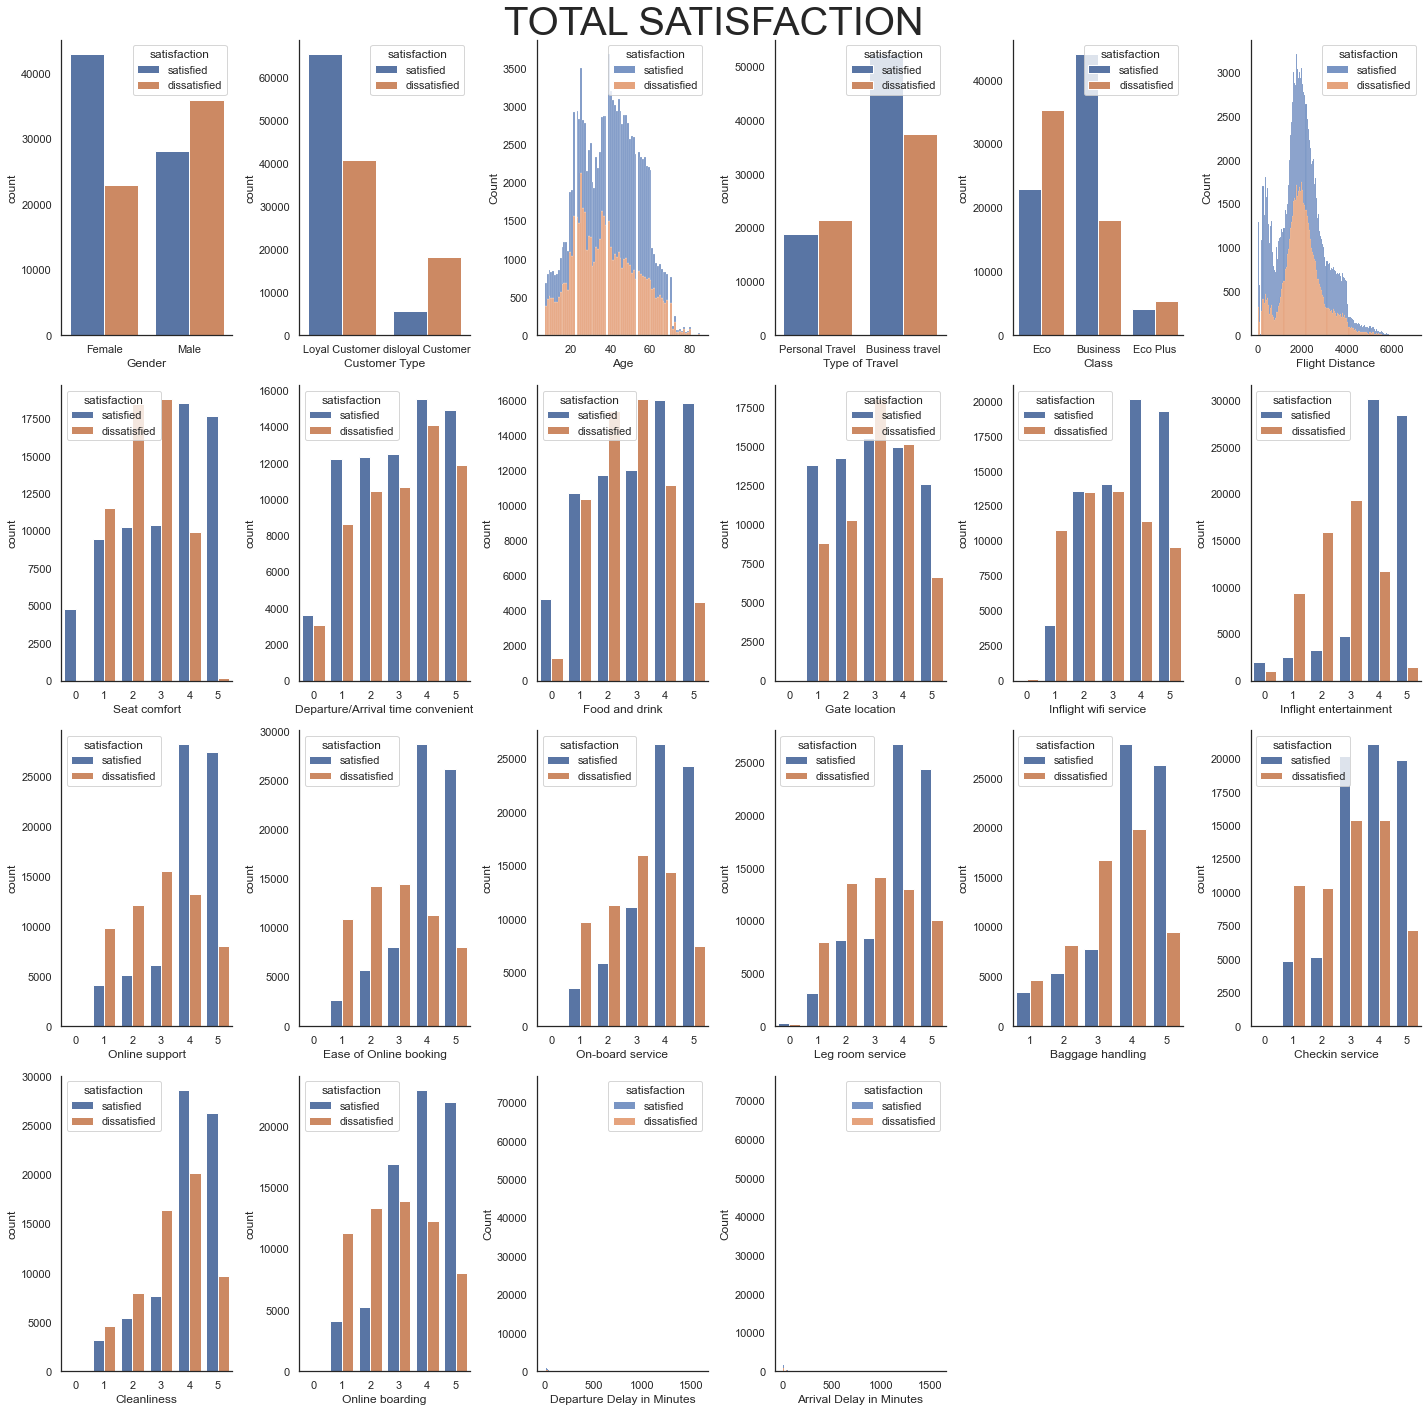

In [28]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[20,20])
for i in range(22):
    fig.add_subplot(4, 6, i+1)
    if i in [2,5,20,21]:
        sns.histplot(data=airline,x=airline.columns[i+1],hue='satisfaction', multiple='stack')
    else:    
        sns.countplot(data=airline,x=airline.columns[i+1],hue='satisfaction')
    sns.despine()
    plt.suptitle('TOTAL SATISFACTION', fontsize=40) # suptitle - super title
    plt.tight_layout()
    fig.savefig('test.png') # saving the below visualization as png file



## UNIVARIATE ANALYSIS:

### NUMERIC COLUMNS:


### Age:

In [29]:
airline['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [31]:
airline.groupby('satisfaction')['Age'].mean()

satisfaction
dissatisfied    37.466671
satisfied       41.050051
Name: Age, dtype: float64

In [15]:
pd.pivot_table(airline,index='satisfaction',values='Age',aggfunc='mean')

Age
satisfaction           
dissatisfied  37.466671
satisfied     41.050051

<AxesSubplot: xlabel='Age'>

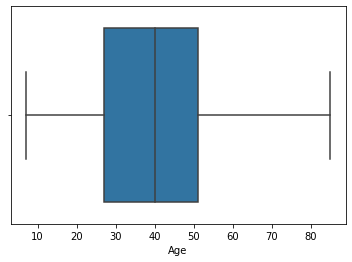

In [16]:
sns.boxplot(airline['Age'])

There are not outliers in the variable age, it is right skewed. The average age of the satisfied customers in more than the dissatisfied customers.

### Flight Distance:


In [17]:
airline['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

In [18]:
pd.pivot_table(airline,index='satisfaction',values='Flight Distance',aggfunc='mean')

Flight Distance
satisfaction                 
dissatisfied      2025.709234
satisfied         1944.770281

<AxesSubplot: xlabel='Flight Distance'>

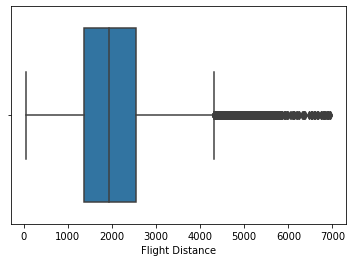

In [19]:
sns.boxplot(airline['Flight Distance'])

There are a few outliers in the flight distance. The passengers who are travelling more distance tend to be more dissatisfied with the airline



### Departure Delay in Minutes:

In [20]:
airline['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [21]:
pd.pivot_table(airline,index='satisfaction',values='Departure Delay in Minutes',aggfunc='mean')

Departure Delay in Minutes
satisfaction                            
dissatisfied                   17.807749
satisfied                      12.154768

<AxesSubplot: xlabel='Departure Delay in Minutes'>

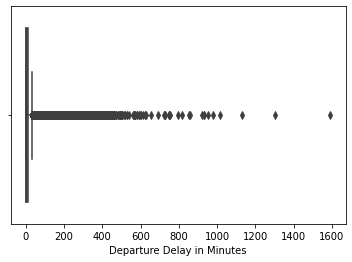

In [22]:
sns.boxplot(airline['Departure Delay in Minutes'])

There are too many outier in the departure delay in minutes column, the outliers cannnot be removed as it may be a cause for the rating. The variable is right skewed. On average passengers are dissatisfied if the departure delay is on average 17.8 minutes.

### Arrival Delay in Minutes:

In [23]:
airline['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [24]:
pd.pivot_table(airline,index='satisfaction',values='Arrival Delay in Minutes',aggfunc='mean')

Arrival Delay in Minutes
satisfaction                          
dissatisfied                 18.504599
satisfied                    12.268883

<AxesSubplot: xlabel='Arrival Delay in Minutes'>

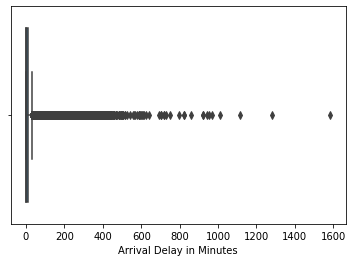

In [25]:
sns.boxplot(airline['Arrival Delay in Minutes'])

There are many outliers in the Arrival Delay in Minutes column, the outliers cannot be removed as it may be a cause of the bad rating, it is right skewed. On average passengers are dissatisfied if there is a delay more than 18.5 minutes

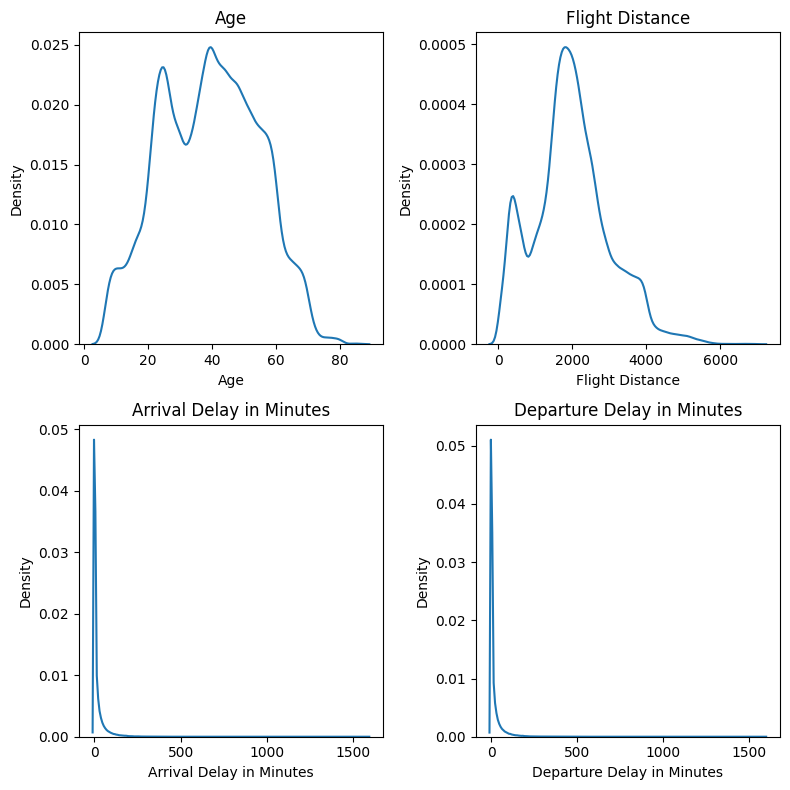

In [26]:
nums= ['Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']

plt.figure(figsize=(8,8),dpi=100)
n=1
for i in nums:
    plot=plt.subplot(2,2, n)
    n+=1
    plt.title(i)
    sns.kdeplot(data=airline[i])
    plt.tight_layout()
    

In [32]:
cols = ['satisfaction','Gender','Customer Type','Type of Travel','Class','Seat comfort',
       'Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment',
       'Online support','Ease of Online booking','On-board service','Leg room service',
        'Baggage handling','Checkin service','Cleanliness','Online boarding'] 
for col in cols:
    #print(f'''Value counts of column: {col}:''')
    print('Value counts of column:',col)
    print(airline[col].value_counts())
    print()

Value counts of column: satisfaction
satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Value counts of column: Gender
Female    65899
Male      63981
Name: Gender, dtype: int64

Value counts of column: Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Value counts of column: Type of Travel
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Value counts of column: Class
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

Value counts of column: Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64

Value counts of column: Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64

Value counts of column: Food and drink
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: Fo

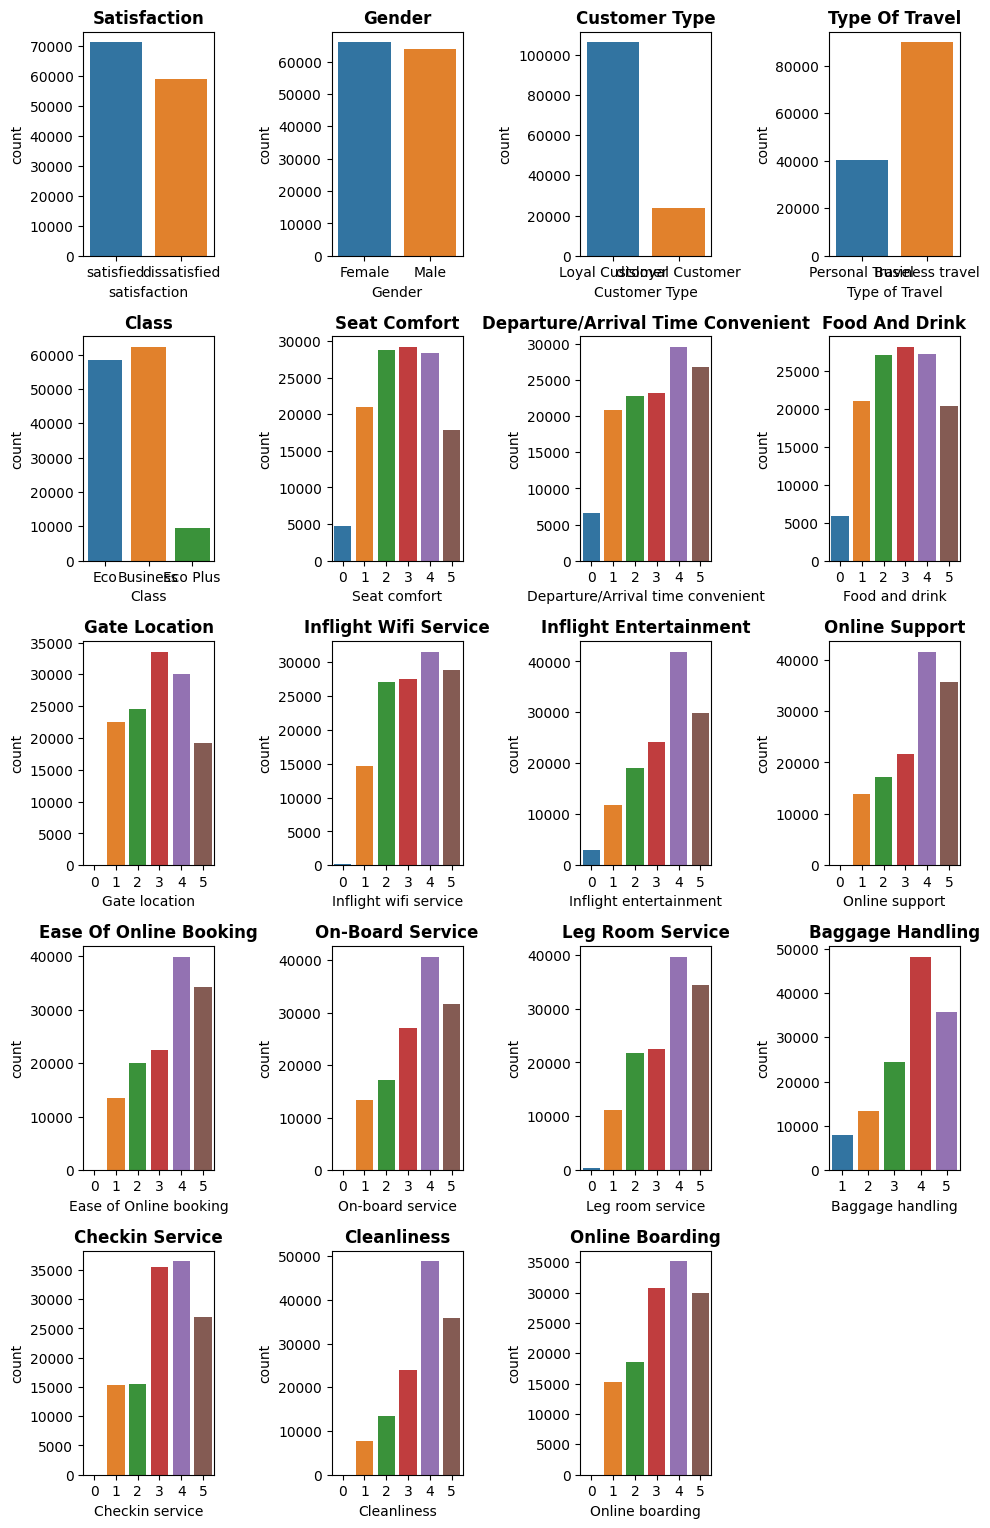

In [28]:
plt.figure(figsize=(10,18),dpi=100)
n=1
for i in cols:
    plot=plt.subplot(6, 4, n)
    n+=1
    sns.countplot(airline[i])
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()
    

**INFERENCE**

1. From the above plot, we can observe the the most common rating for each of the variable(Service) in the data

## Categorical Columns:


### Satisfaction (Target Variable):


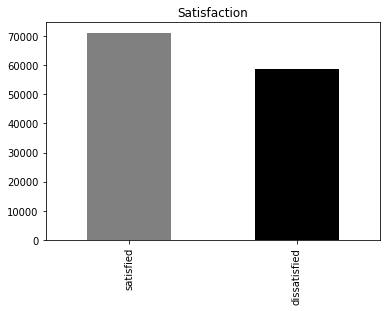

In [29]:
airline['satisfaction'].value_counts().plot(kind='bar',color=['grey','black'])
plt.title('Satisfaction')
plt.show()

There are almost similar nunber of satisfied and dissatisfied customers in the dataset.

In [31]:
def countplot(data):
    for feature in data.select_dtypes(include='object').columns.to_list():
        plt.figure(figsize=(12,5))
        ax=sns.countplot(data=data, x=feature, color="green")
        plt.xticks(rotation=90)
        plt.show()

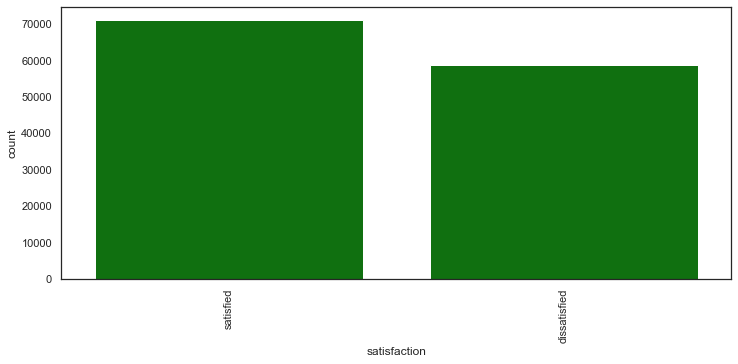

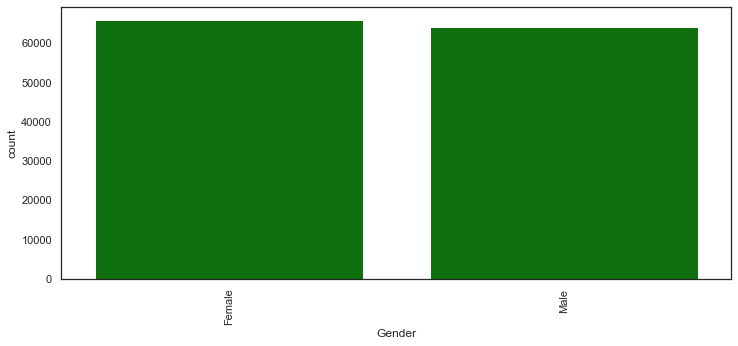

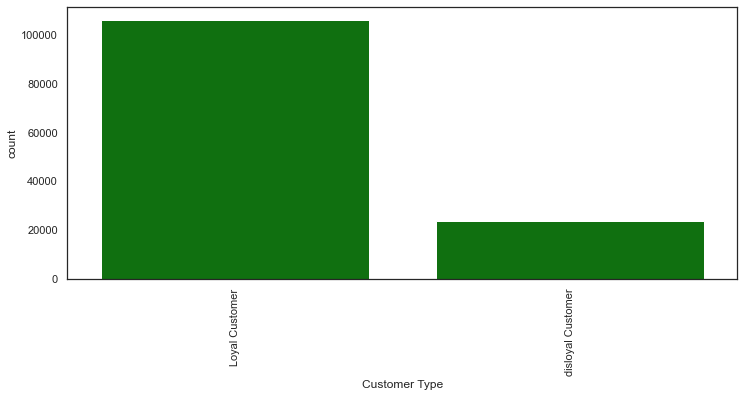

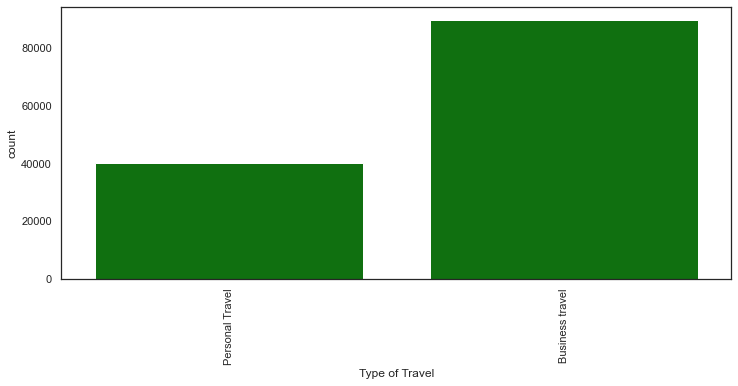

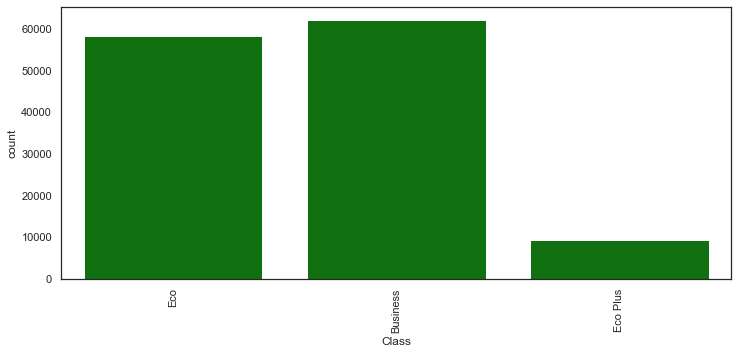

In [32]:
countplot(airline)

**INFERENCE**

1. There are almost similar nunber of satisfied and dissatisfied customers in the dataset.
2. There are almost equal number of male and female in the dataset,female customers are more satisfied with the airline
3. There are more number of loyal customers in the dataset in comparision to disloyal customers which maybe the representation of the population. Loyal mostly for the loyal customers are satisfied with the airline and most of the disloyal customers are not satisfied with the airline
4. About 60% of the customers use the airline for business travel, 40% use it for personal travel. Majority of the business travellers are satisfied with the airline. Almost equal number of personal travellers are satisfied and dissatisfied with the airline
5. Most of the customers travelled by business class, which is followed closely by eco and the least number of customers travelled by Eco Plus. The passengers in Business class are mostly satisfied with the airline and passengers in economy class are mostly dissatisied with the airline

## Bivariate Analysis:



### Numerical vs Numerical

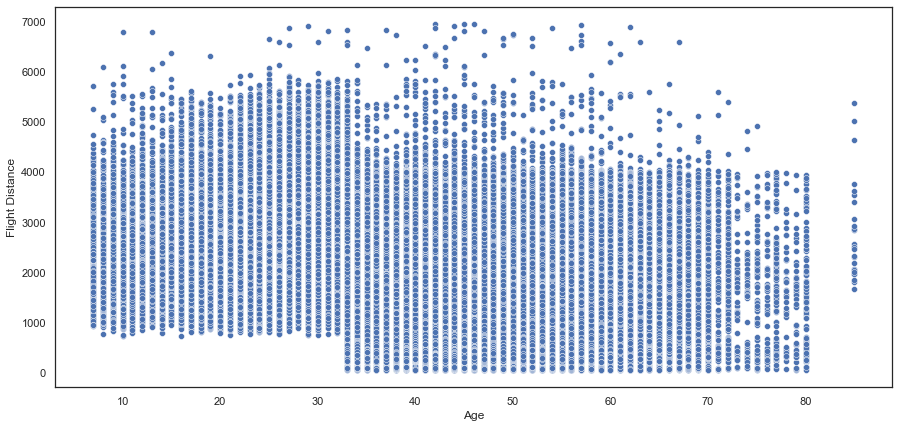

In [47]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=airline,x='Age',y='Flight Distance')
plt.show()

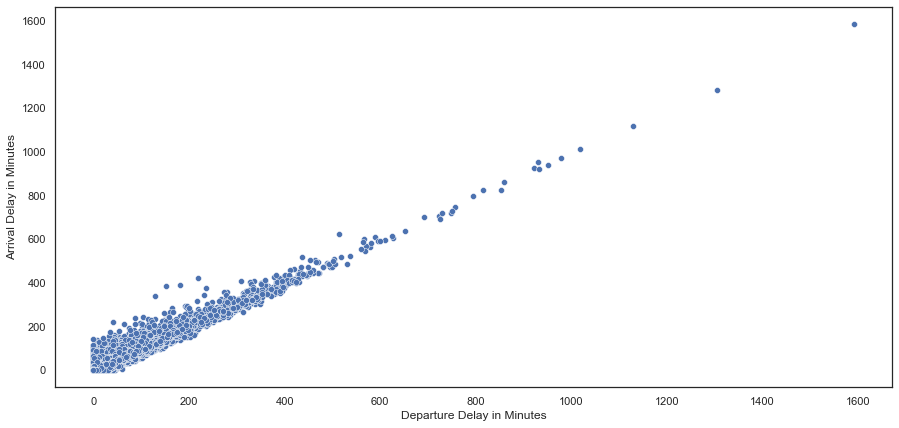

In [48]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=airline,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')
plt.show()

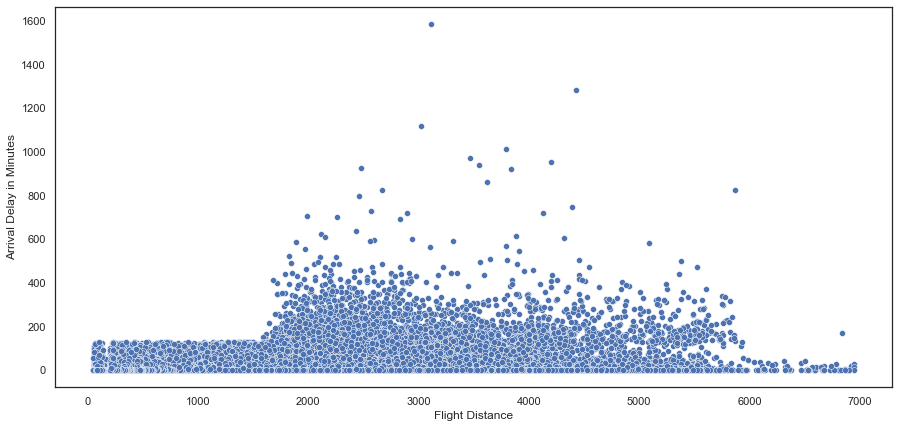

In [49]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=airline,x='Flight Distance',y='Arrival Delay in Minutes')
plt.show()

### Numerical Vs Categorical:

In [36]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.figure(figsize=(15,7))
    sns.swarmplot(data=data,x=feature1,y=feature2)
    plt.axhline(30000,color='red')
    plt.axhline(15000,color='red')
    plt.subplot(1,2,2)
    
    plt.show()

In [40]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Age")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    
    plt.show()

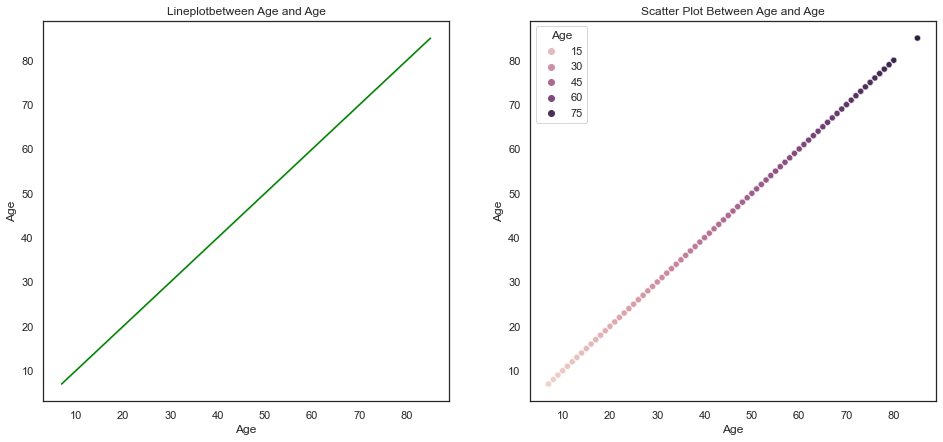

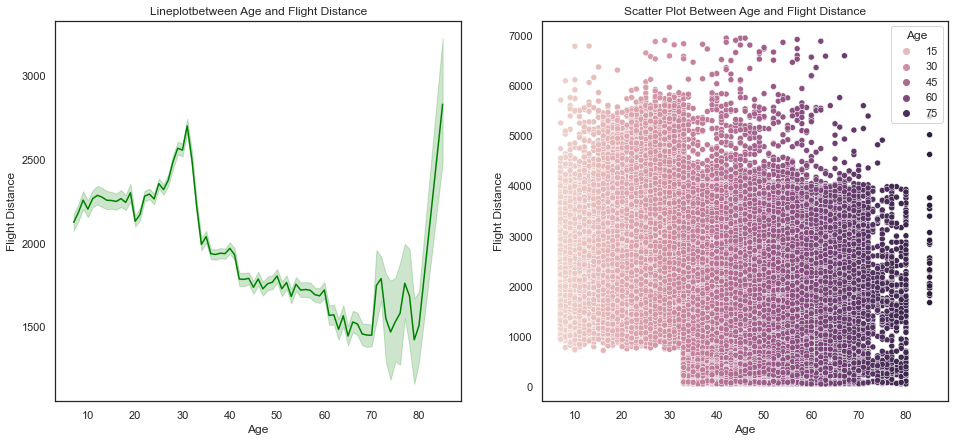

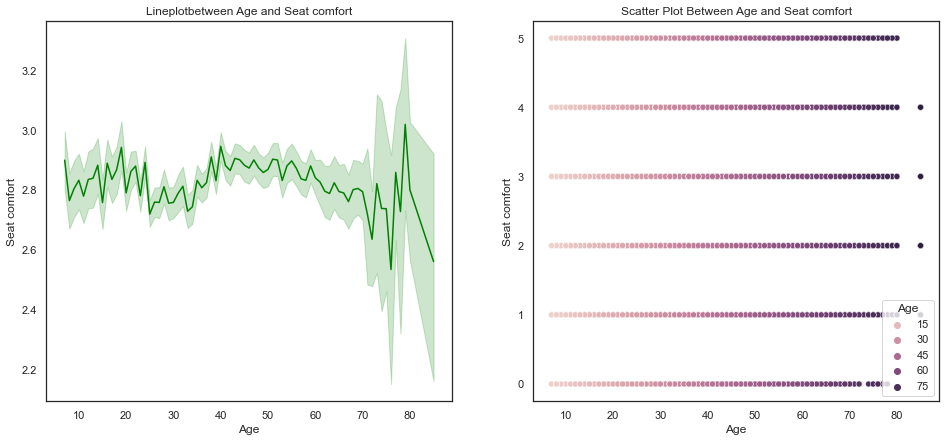

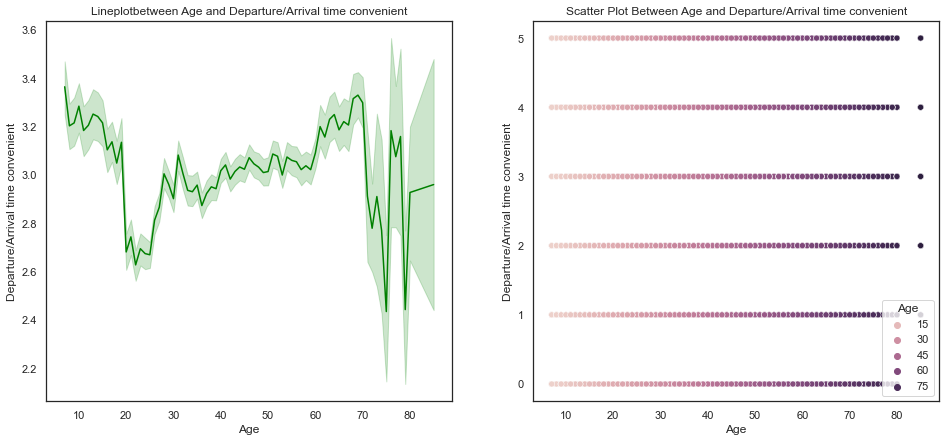

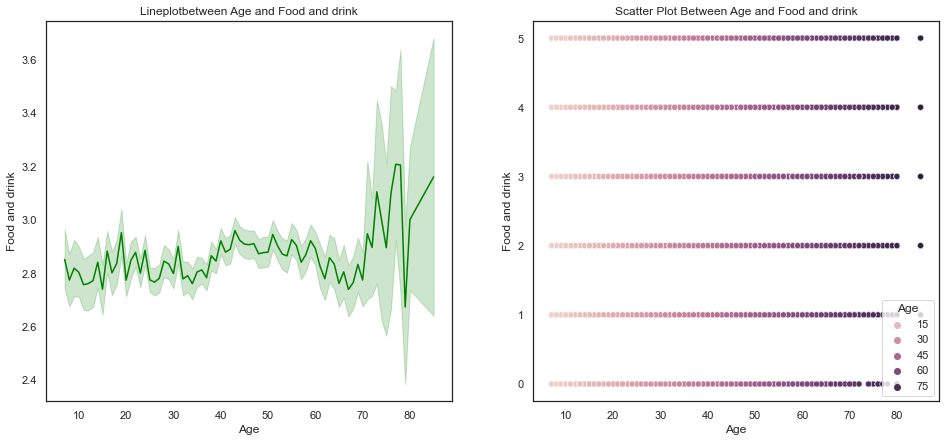

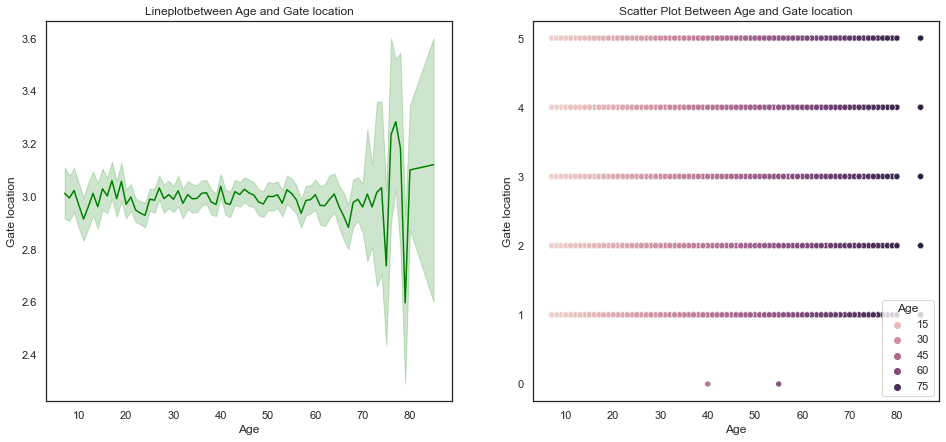

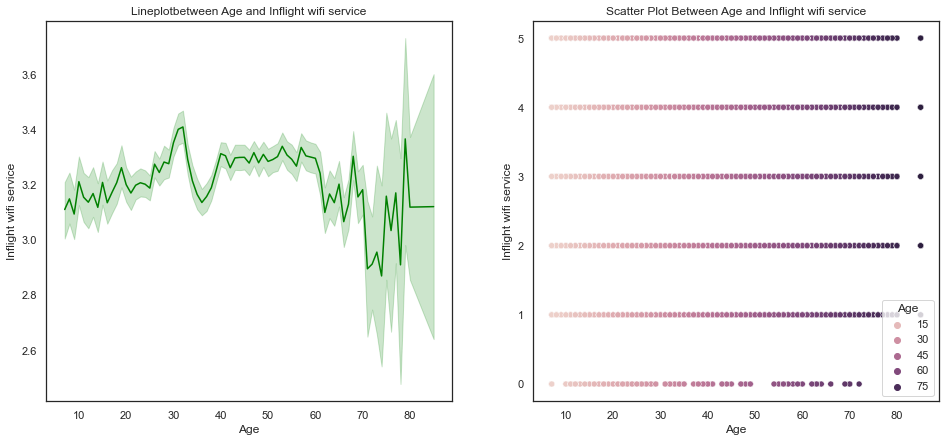

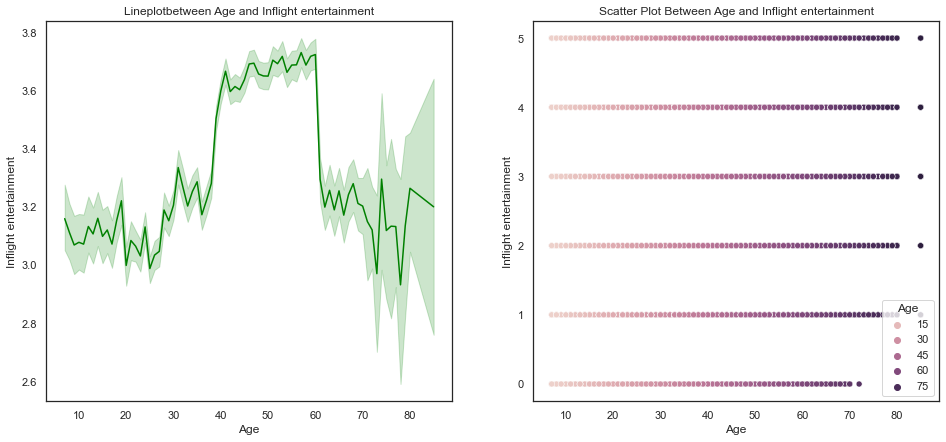

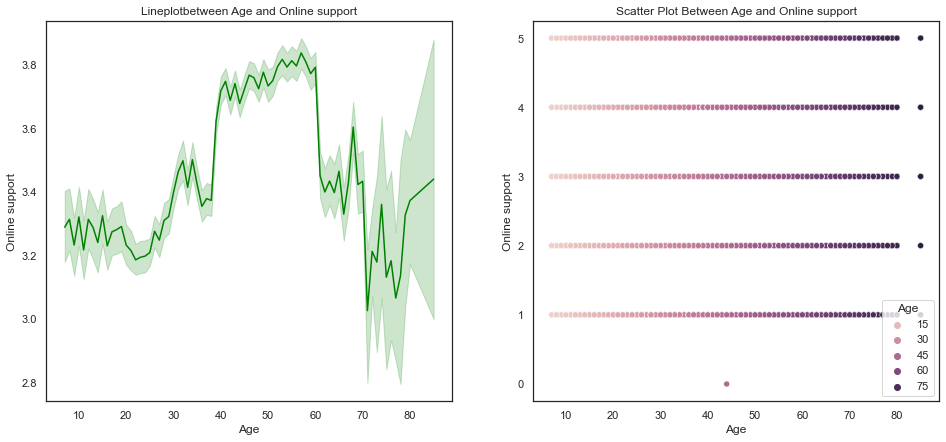

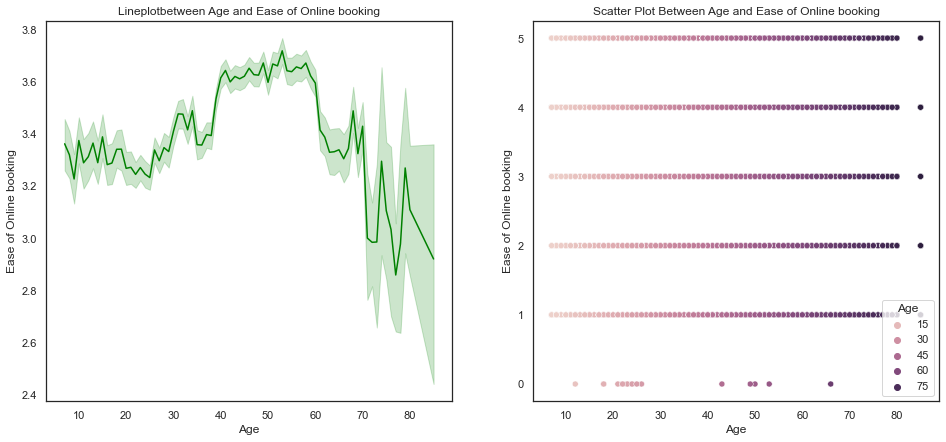

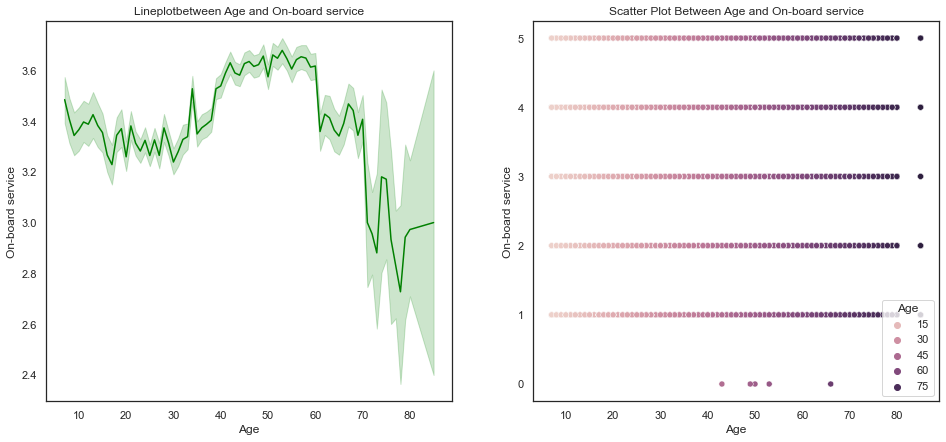

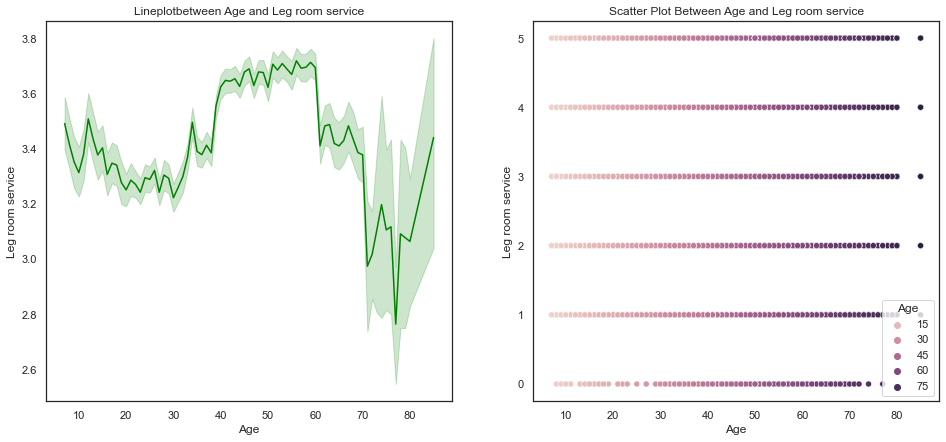

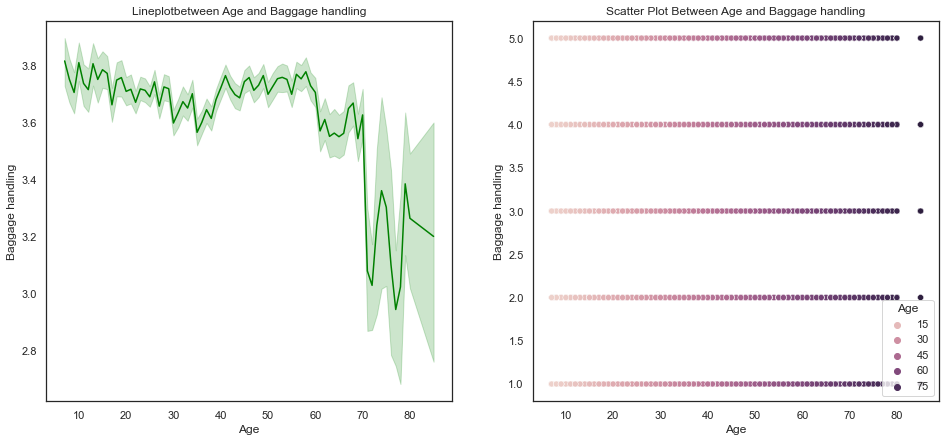

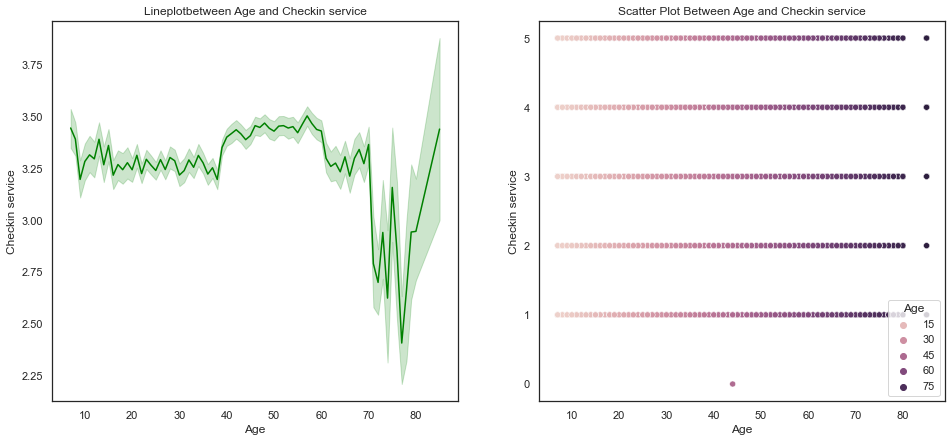

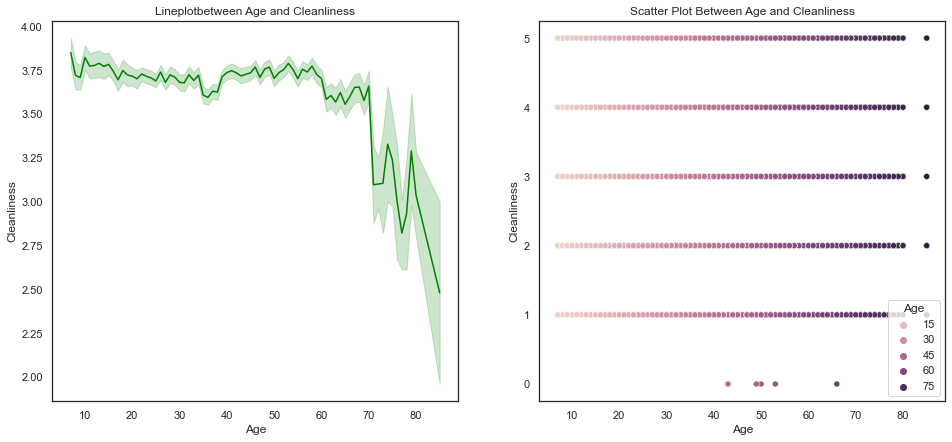

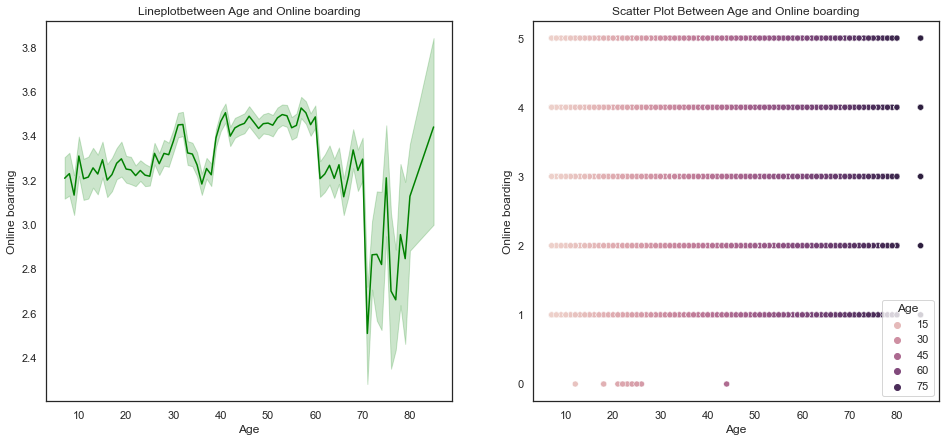

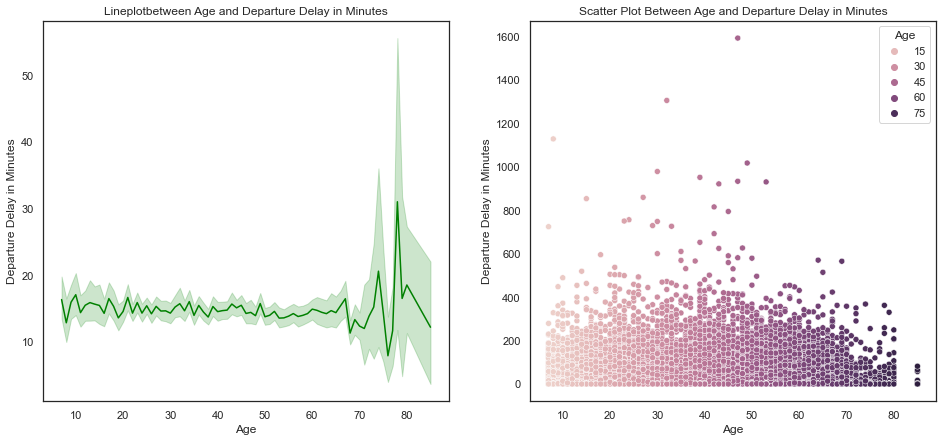

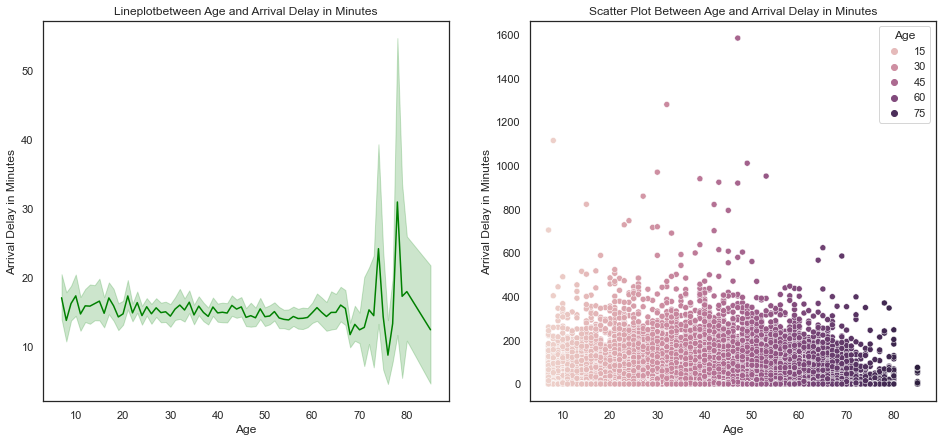

In [41]:
for col in airline.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=airline, feature1="Age", feature2=col)

In [37]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Age")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    plt.show()

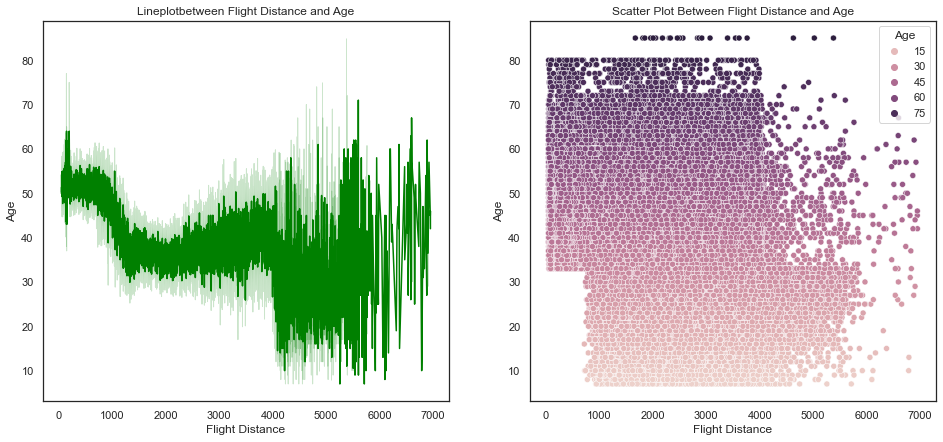

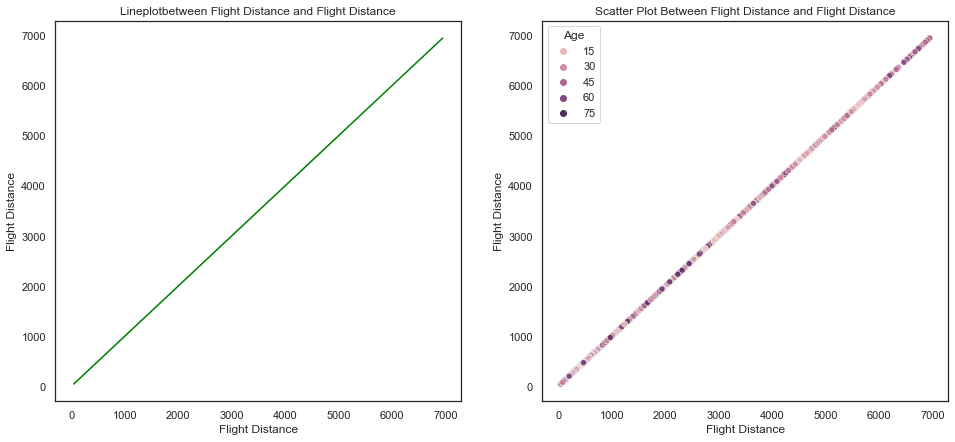

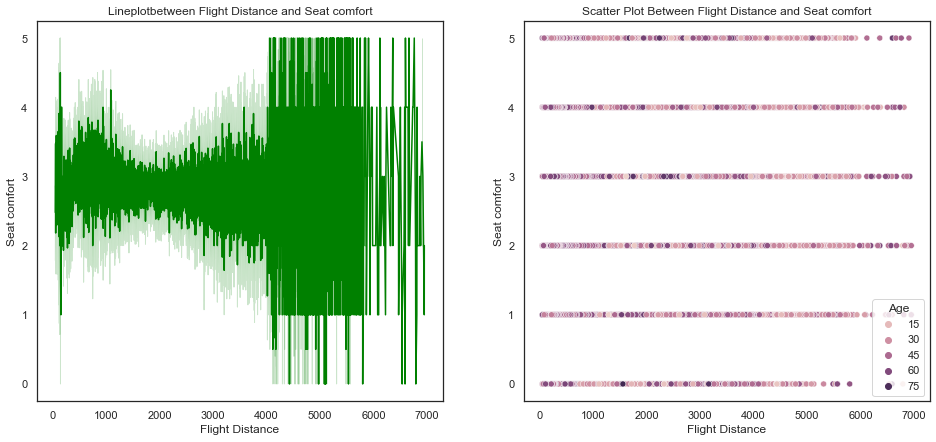

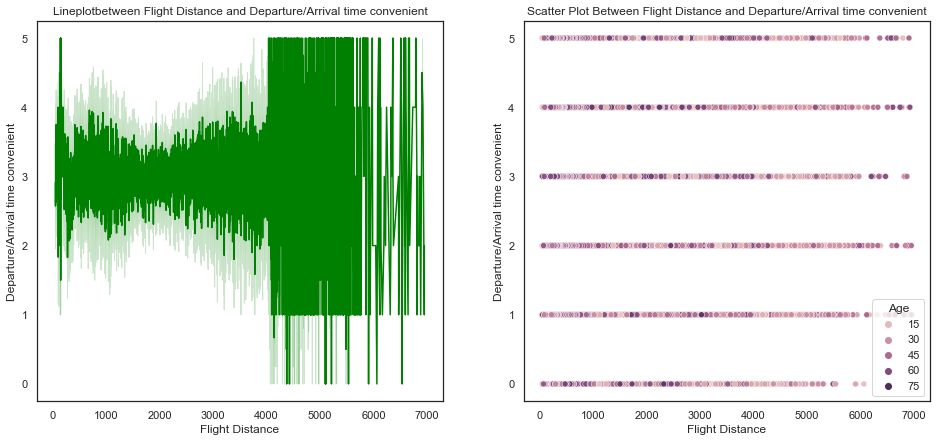

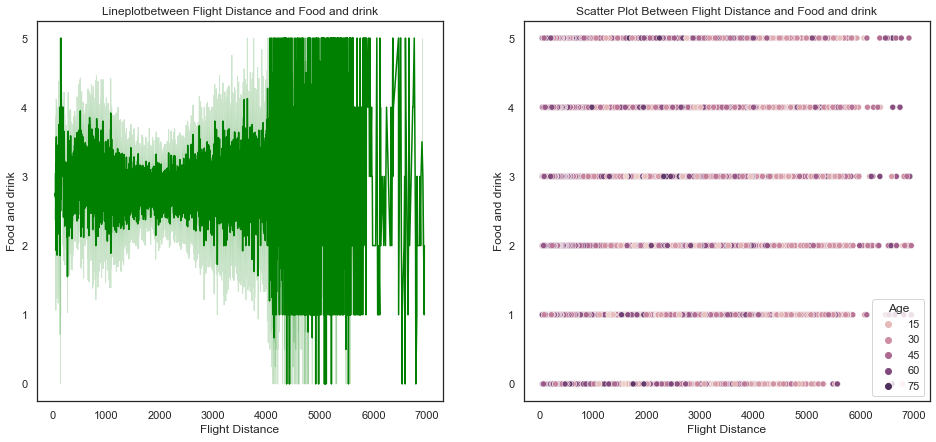

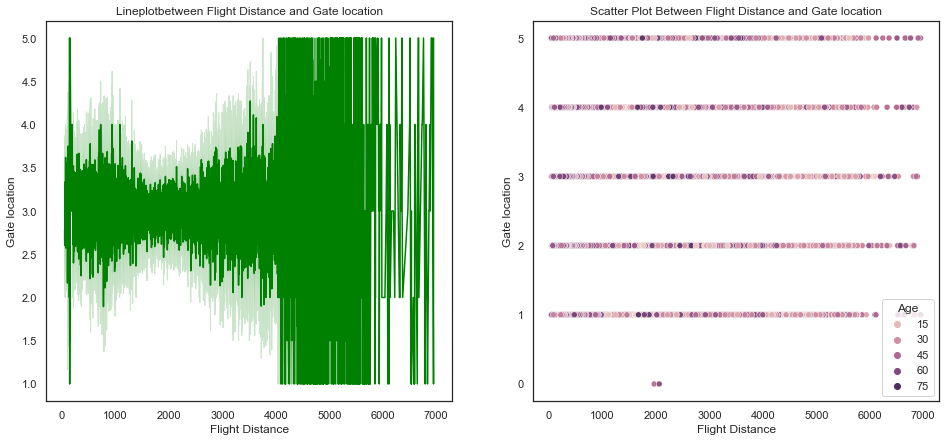

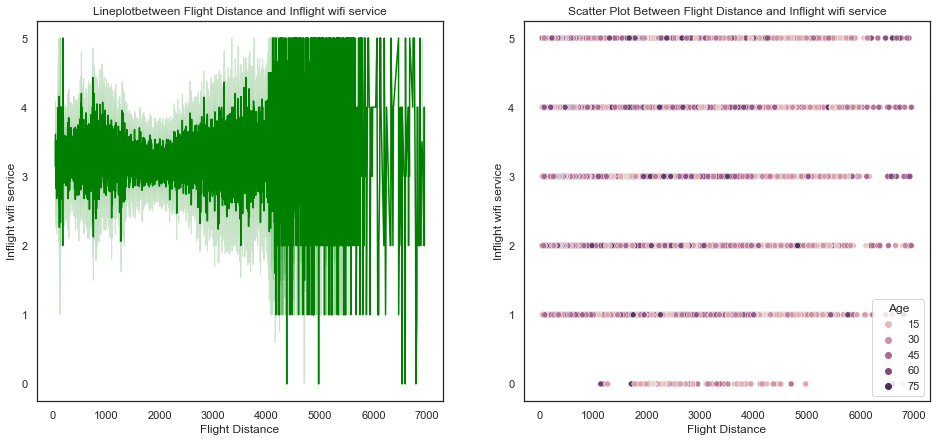

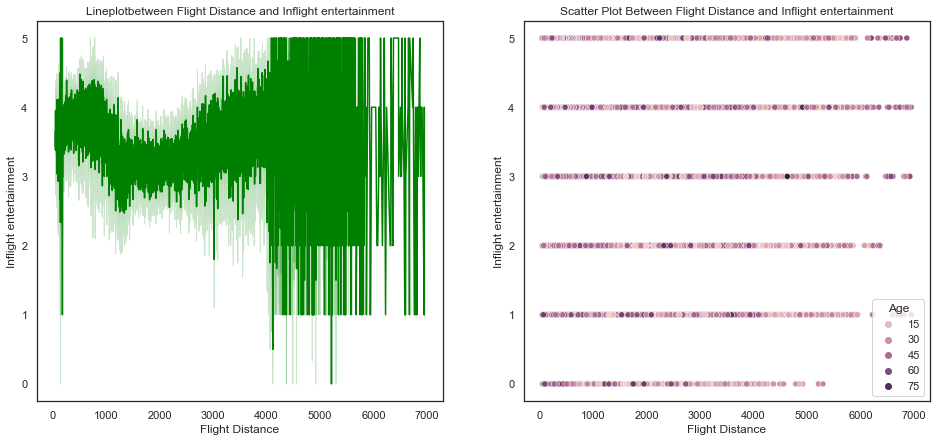

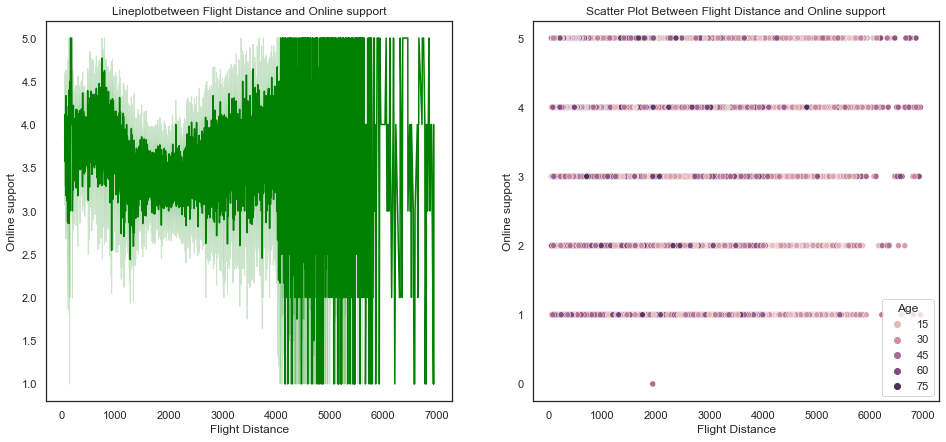

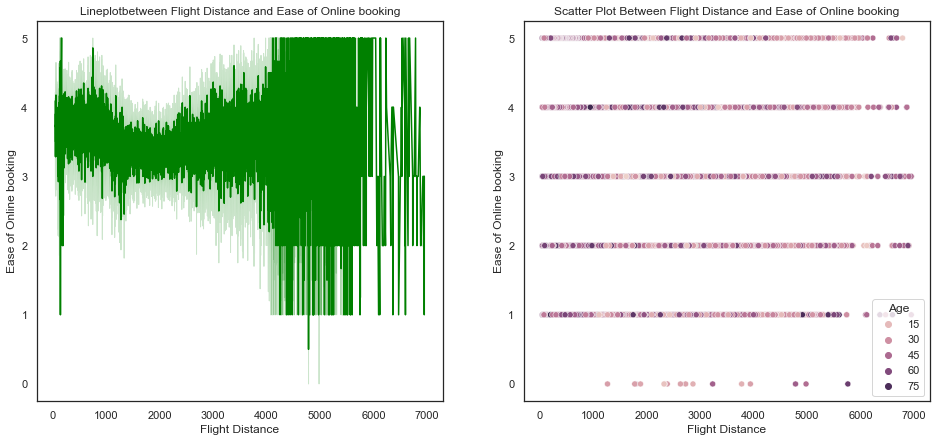

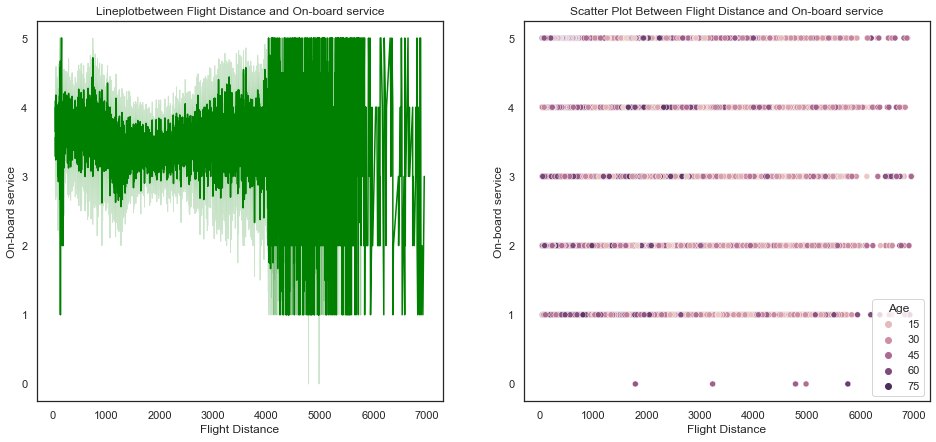

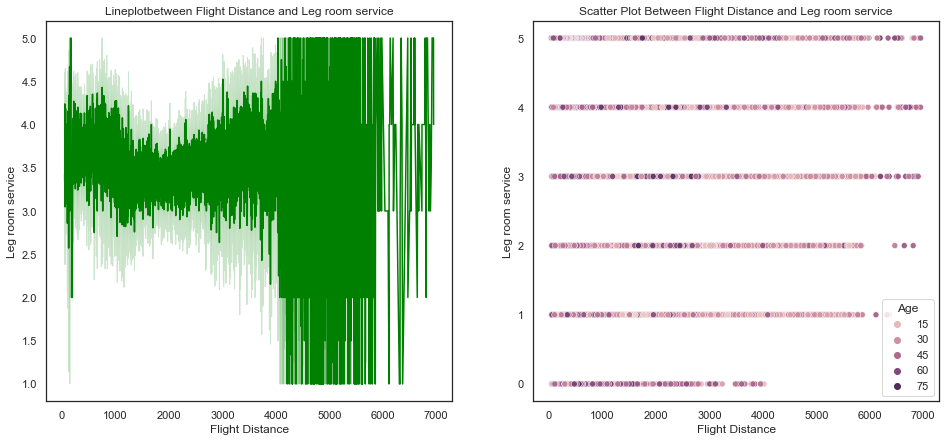

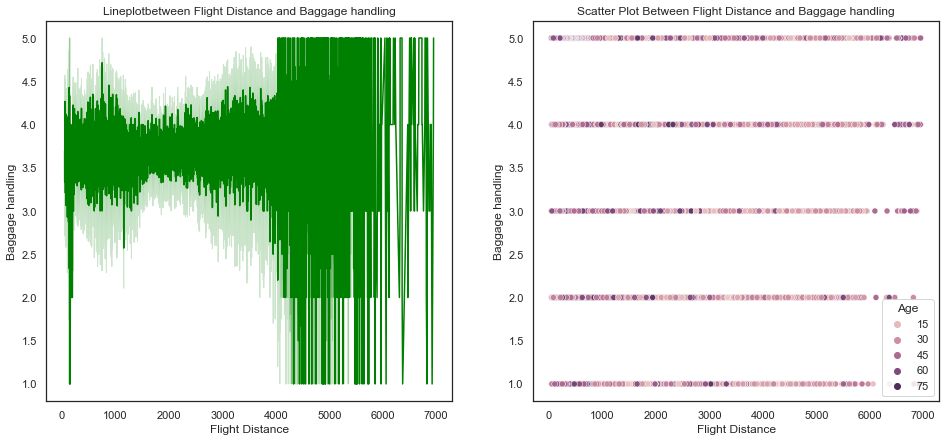

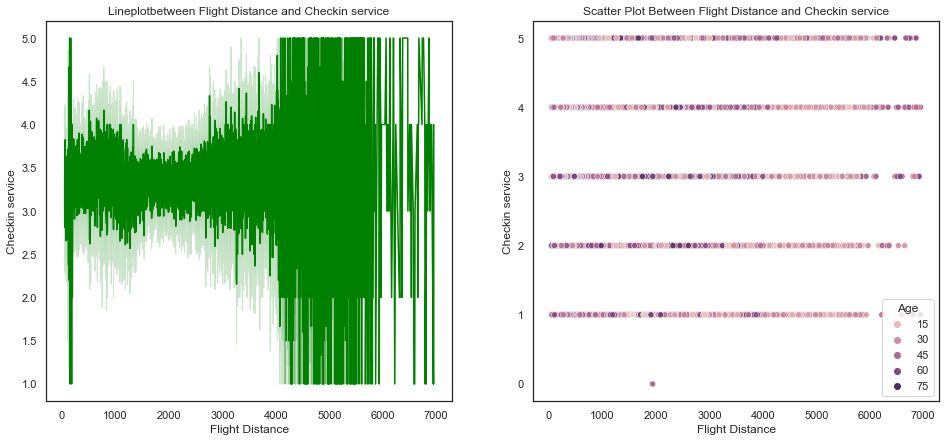

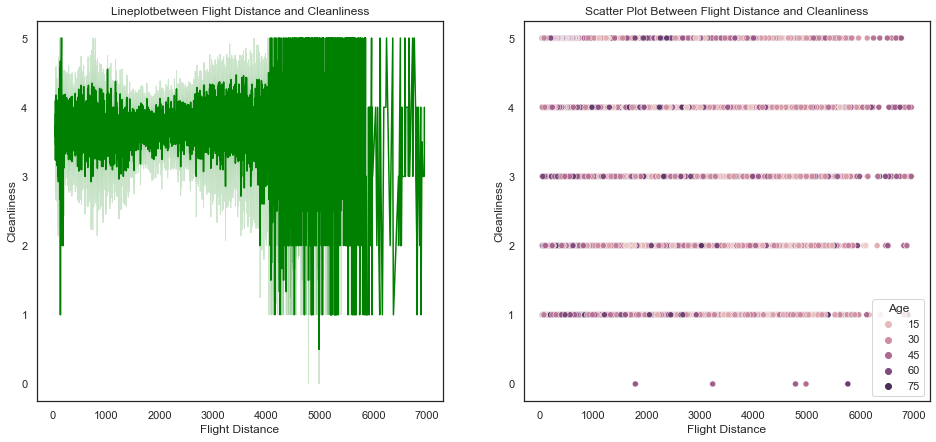

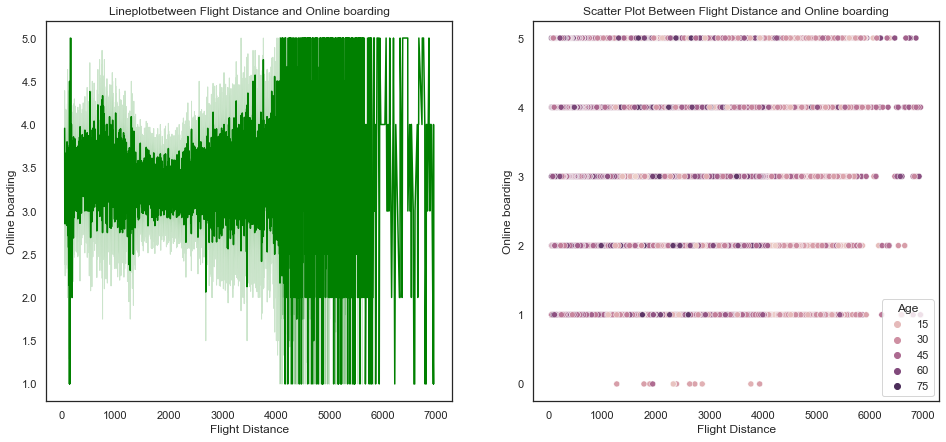

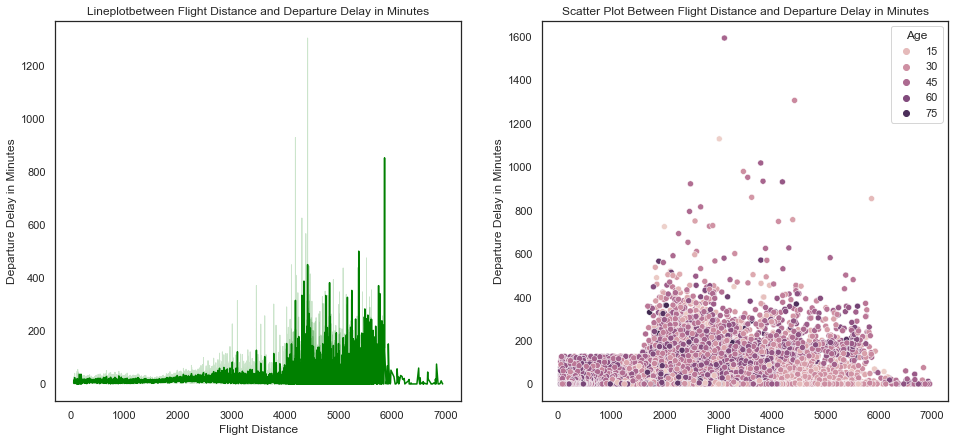

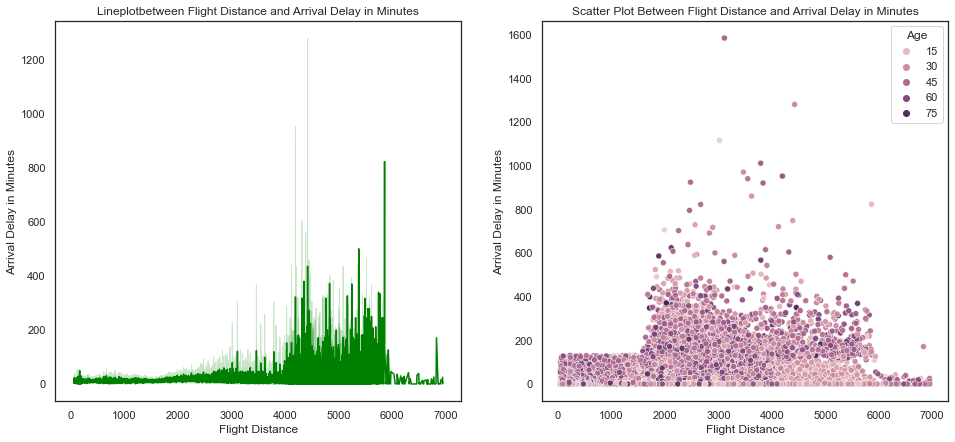

In [21]:
for col in airline.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=airline, feature1="Flight Distance", feature2=col)

### Categorical Vs Categorical

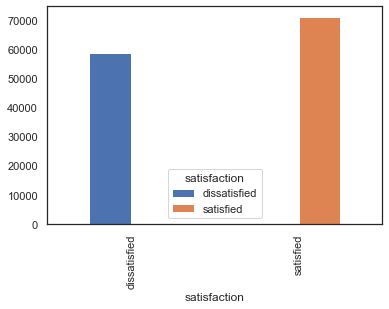

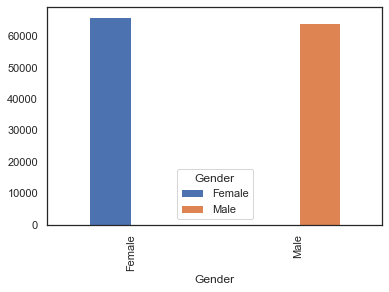

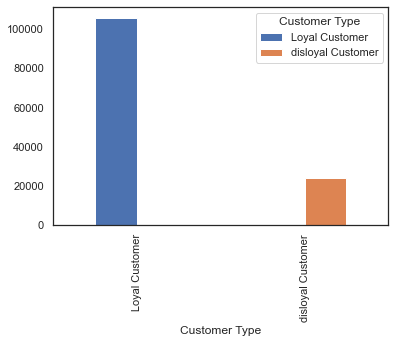

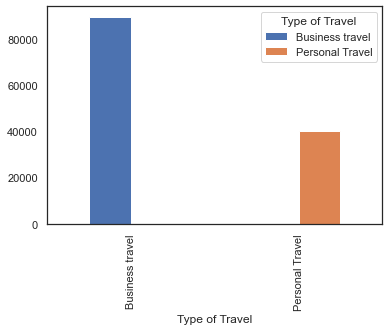

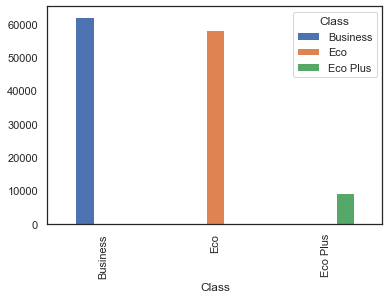

In [38]:
for col in airline.select_dtypes(include="O").columns:
    pd.crosstab(airline[col],airline[col]).plot(kind='bar')

# Multivariate Analysis:


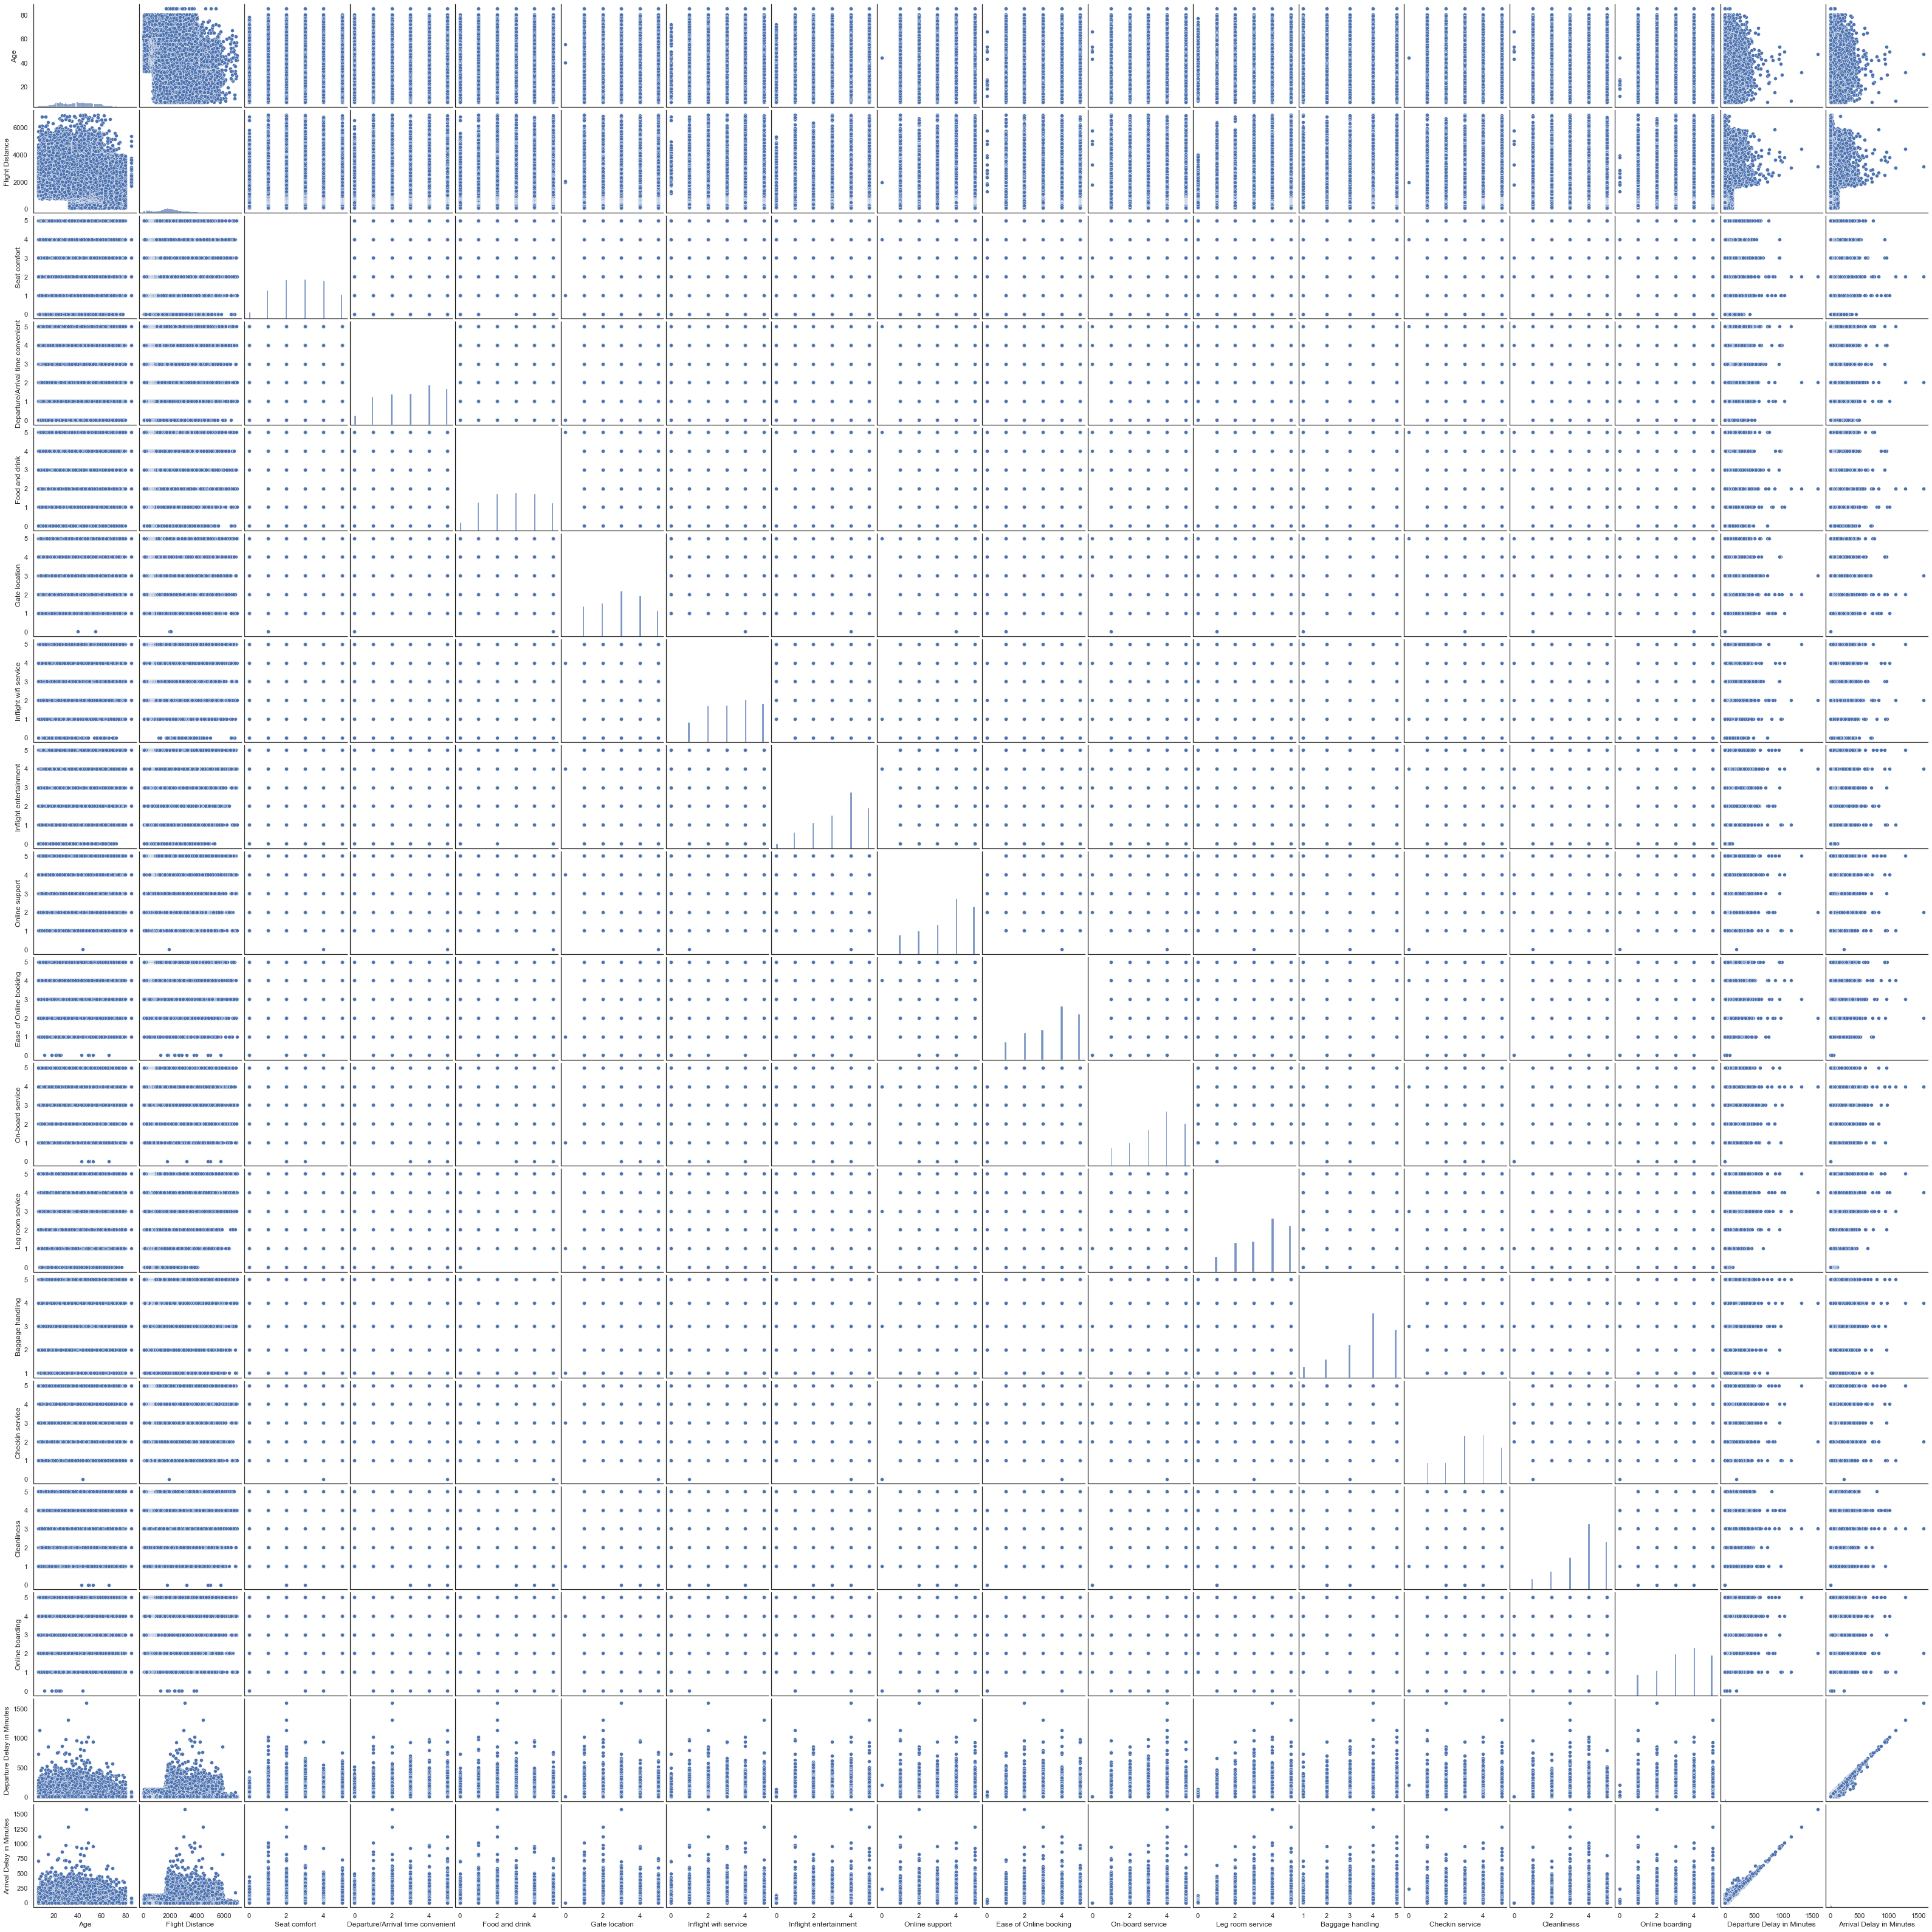

In [39]:
sns.pairplot(airline)

#### Heatmap with Correlation:

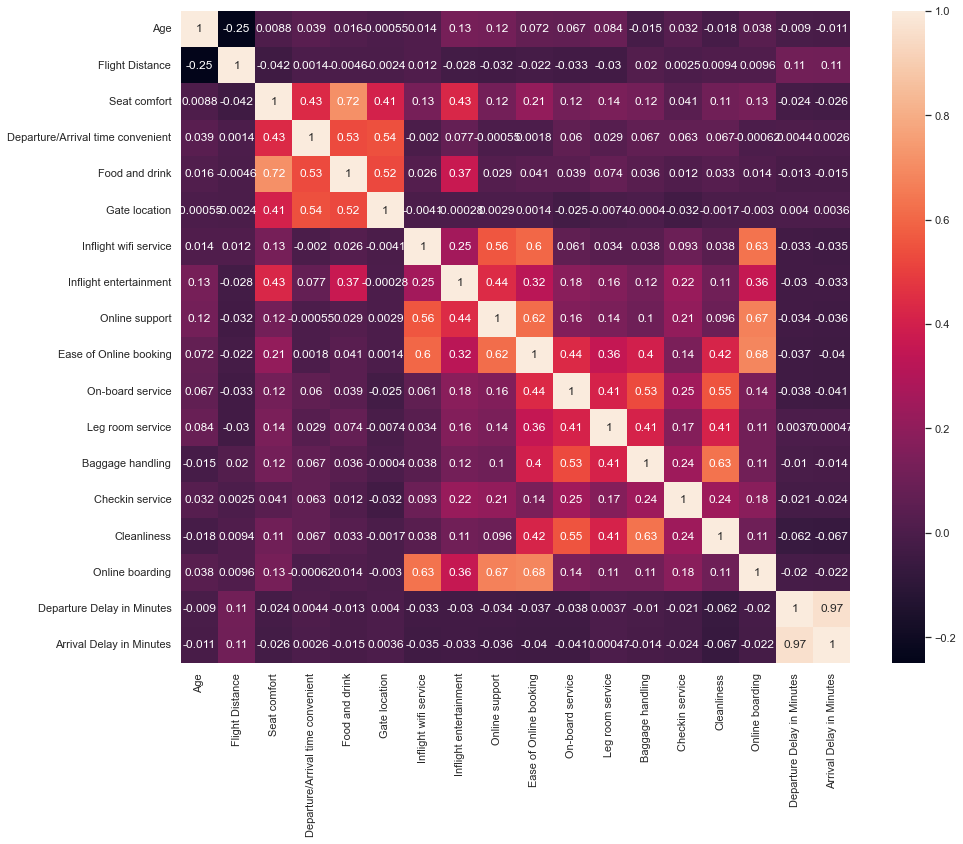

In [33]:
sns.heatmap(airline.corr(),annot=True)
plt.rcParams['figure.figsize']=[15,12]
plt.show()

### Summary of Findings in EDA
1. There is almost similar number of satisfied and dissatisfied customers there is no imbalance in the dataset.
2. Female customers are more satisfied with the airline in comparision of the male customers.
3. Loyal Customers are in general satisfied with the airline and disloyal customers are mostly dissatisfied with the airline
4. Most of the passengers in the airline travel by business class, most of the business class passengers are satisfied with the airline
5. The airline is mostly used for business travel, more number of business travellers are satisified than dissatisfied with the airline
6. There are long delays in both arrival and departure of the airline. There is only a few minutes differnce in the mean delay for arrival and departure
7. The mean age of the dissatisfied passengers is less than the satisfied customers

## Finding the Null Values:

In [30]:
airline.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## Percentage of Null Values in Arrival Delay in Minutes:

In [35]:
null=pd.DataFrame(airline.isnull().sum(),columns=['Null Values'])
null['Percentage (%)']=(airline.isna().sum()/len(airline)*100)
null = null[null['Percentage (%)'] > 0]
null
#null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

Null Values  Percentage (%)
Arrival Delay in Minutes          393        0.302587

### Dropping the existing Null Values:

In [32]:
airline.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
airline.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# Outliers Detection:

In [33]:
def preprocess_inputs(airline):
    airline = airline.copy()
    
    # Fill missing arrival delay values with column mean
    airline['Arrival Delay in Minutes'] = airline['Arrival Delay in Minutes'].fillna(airline['Arrival Delay in Minutes'].mean())
    
    # Binary encoding
    airline['Gender'] = airline['Gender'].replace({
        'Female': 0,
        'Male': 1
    })
    airline['Customer Type'] = airline['Customer Type'].replace({
        'disloyal Customer': 0,
        'Loyal Customer': 1
    })
    airline['Type of Travel'] = airline['Type of Travel'].replace({
        'Personal Travel': 0,
        'Business travel': 1
    })
    
    # One-hot encoding
    flight_class_dummies = pd.get_dummies(airline['Class'], prefix='Flight_class')
    airline = pd.concat([airline, flight_class_dummies], axis=1)
    airline = airline.drop('Class', axis=1)
    
    return airline

In [34]:
X = preprocess_inputs(airline)
X

satisfaction  Gender  Customer Type  Age  Type of Travel  \
0          satisfied       0              1   65               0   
1          satisfied       1              1   47               0   
2          satisfied       0              1   15               0   
3          satisfied       0              1   60               0   
4          satisfied       0              1   70               0   
...              ...     ...            ...  ...             ...   
129875     satisfied       0              0   29               0   
129876  dissatisfied       1              0   63               0   
129877  dissatisfied       1              0   69               0   
129878  dissatisfied       1              0   66               0   
129879  dissatisfied       0              0   38               0   

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265             0                                  0   
1                  2464             0                                  0   
2                  2138             0                                  0   
3                   623             0                                  0   
4                   354             0                                  0   
...                 ...           ...                                ...   
129875             1731             5                                  5   
129876             2087             2                                  3   
129877             2320             3                                  0   
129878             2450             3                                  2   
129879             4307             3                                  4   

        Food and drink  Gate location  ...  Leg room service  \
0                    0              2  ...                 0   
1                    0              3  ...                 4   
2                    0              3  ...                 3   
3                    0              3  ...                 0   
4                    0              3  ...                 0   
...                ...            ...  ...               ...   
129875               5              3  ...                 3   
129876               2              4  ...                 3   
129877               3              3  ...                 3   
129878               3              2  ...                 2   
129879               3              3  ...                 5   

        Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                      3                5            3                2   
1                      4                2            3                2   
2                      4                4            4                2   
3                      1                4            1                3   
4                      2                4            2                5   
...                  ...              ...          ...              ...   
129875                 4                4            4                2   
129876                 3                1            2                1   
129877                 4                2            3                2   
129878                 3                2            1                2   
129879                 5                3            3                3   

        Departure Delay in Minutes  Arrival Delay in Minutes  \
0                                0                       0.0   
1                              310                     305.0   
2                                0                       0.0   
3                                0                       0.0   
4                                0                       0.0   
...                            ...                       ...   
129875                           0                       0.0   
129876                         174                     172.0   
129877                         1

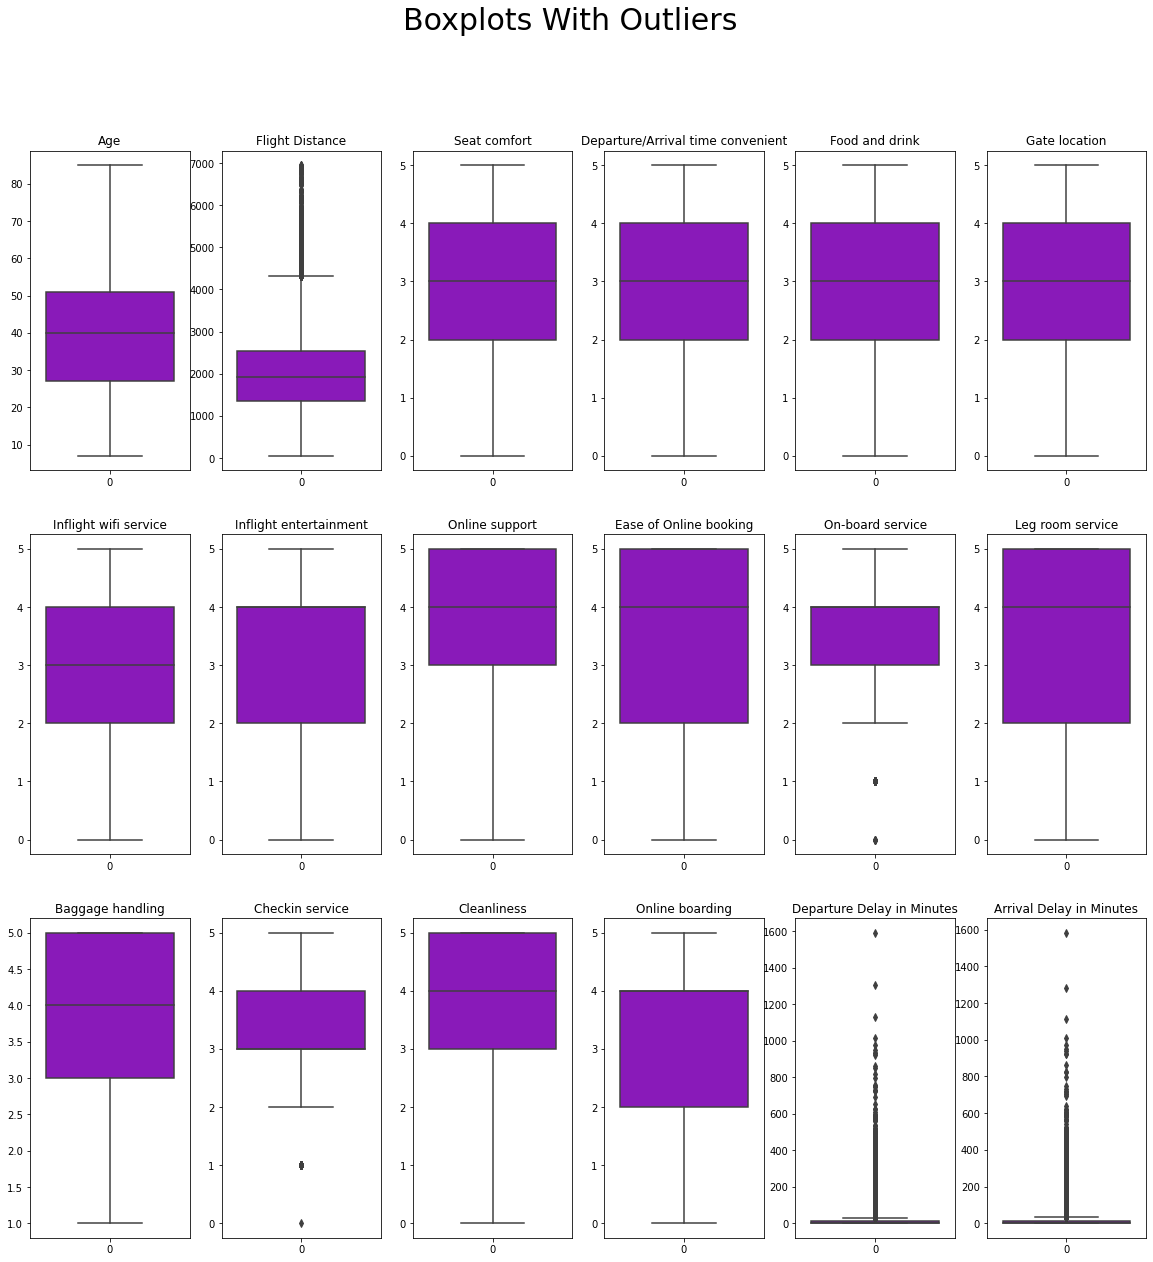

In [35]:
airline_drop = X.drop('satisfaction', axis=1).copy()
nonbinary_columns = [column for column in airline_drop.columns if len(airline_drop[column].unique()) > 2]

plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=airline_drop[column], color='darkviolet')
    plt.title(column)

plt.suptitle("Boxplots With Outliers", size=30)
plt.show()

**INFERENCE:**

In the above Boxplots, Its shown that **'Flight Distance','On-board service','Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes','Online boarding'** are having outliers.

# Outliers Removal:

In [36]:
from scipy import stats
from scipy.stats import norm

def remove_outliers(airline, columns, threshold):
    airline = airline.copy()
    
    # Calculate the lower and upper bounds on the Z distribution given a threshold value
    lower_bound = stats.norm.ppf(q=(threshold / 2), loc=0, scale=1)
    upper_bound = stats.norm.ppf(q=1 - (threshold / 2), loc=0, scale=1)
    
    # Calculate z-scores of every example in the columns specified
    outlier_df = airline.loc[:, columns].copy()
    zscores = pd.DataFrame(stats.zscore(outlier_df, axis=0), index=outlier_df.index, columns=outlier_df.columns)
    
    # Get boolean arrays denoting the outlier examples
    lower_outliers = (zscores < lower_bound).any(axis=1)
    upper_outliers = (zscores >= upper_bound).any(axis=1)
    
    # Get indicies of all outlier examples
    outliers = airline[pd.concat([lower_outliers, upper_outliers], axis=1).any(axis=1)].index
    
    # Drop the outliers
    airline = airline.drop(outliers, axis=0).reset_index(drop=True)
    print(len(outliers), "examples dropped.")
    
    return airline

41105 examples dropped.


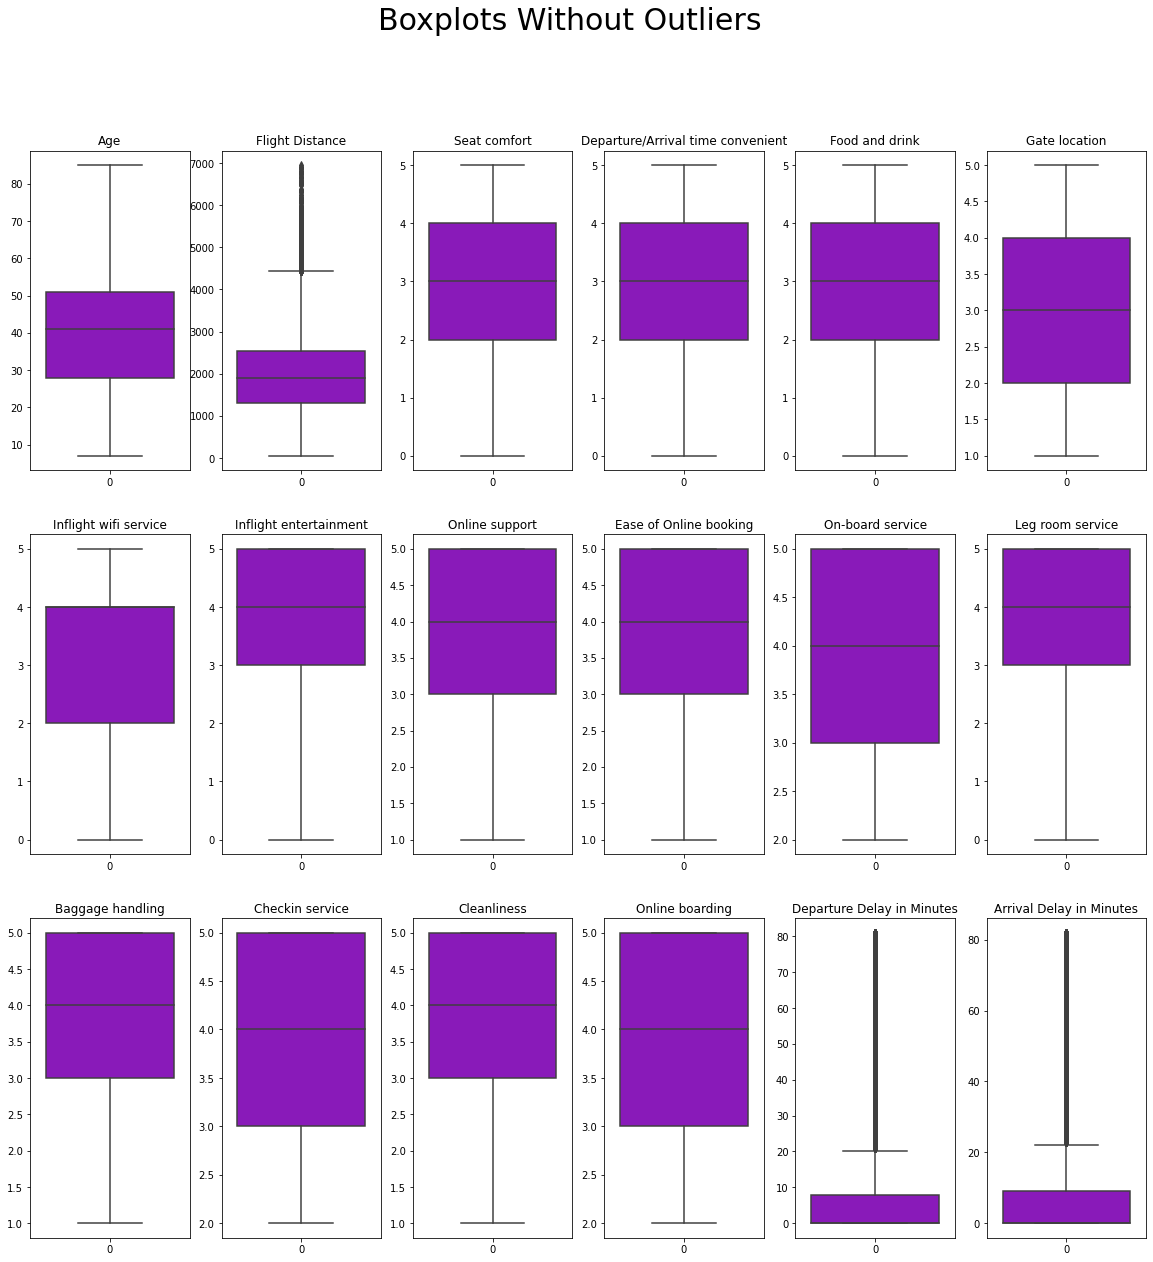

In [37]:
outliers_df = remove_outliers(
    airline=X,
    columns=[
        'On-board service',
        'Checkin service',
        'Departure Delay in Minutes',
        'Arrival Delay in Minutes',
        'Online boarding'
    ],
    threshold=0.08
)

plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(data=outliers_df[column], color='darkviolet')
    plt.title(column)

plt.suptitle("Boxplots Without Outliers", size=30)
plt.show()

# Encoding:

In [38]:
# ENCODING the target column to 0 and 1 :
# ORDINAL ENCODING

airline['satisfaction']=airline['satisfaction'].replace({'satisfied':0,'dissatisfied':1})
airline.rename(columns={'satisfaction':'Dissatisfied'},inplace=True)
airline

Dissatisfied  Gender      Customer Type  Age   Type of Travel  \
0                  0  Female     Loyal Customer   65  Personal Travel   
1                  0    Male     Loyal Customer   47  Personal Travel   
2                  0  Female     Loyal Customer   15  Personal Travel   
3                  0  Female     Loyal Customer   60  Personal Travel   
4                  0  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875             0  Female  disloyal Customer   29  Personal Travel   
129876             1    Male  disloyal Customer   63  Personal Travel   
129877             1    Male  disloyal Customer   69  Personal Travel   
129878             1    Male  disloyal Customer   66  Personal Travel   
129879             1  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

To make the analysis less confusing, **'satisfied is coded as 0' and 'dissatisfied as coded as 1'** as it is what we are looking for the column satisfaction is renamed as **'Dissatisfied'**

In [39]:
# Ordinal encoding on 'Class' column

airline['Class'] = airline['Class'].replace({'Eco':1,'Eco Plus':2,'Business':3})

In [40]:
# ENCODING the target column to 0 and 1 :
# ONE-HOT ENCODING on the columns: Male, Disloyal Customer, Personal Travel

airline[['Male','Disloyal Customer','Personal Travel']] = pd.get_dummies(airline[['Gender','Customer Type','Type of Travel']],drop_first=True)
airline.drop(['Gender','Customer Type','Type of Travel'],axis=1,inplace=True)
airline.head()

Dissatisfied  Age  Class  Flight Distance  Seat comfort  \
0             0   65      1              265             0   
1             0   47      3             2464             0   
2             0   15      1             2138             0   
3             0   60      1              623             0   
4             0   70      1              354             0   

   Departure/Arrival time convenient  Food and drink  Gate location  \
0                                  0               0              2   
1                                  0               0              3   
2                                  0               0              3   
3                                  0               0              3   
4                                  0               0              3   

   Inflight wifi service  Inflight entertainment  ...  Leg room service  \
0                      2                       4  ...                 0   
1                      0                       2  ...                 4   
2                      2                       0  ...                 3   
3                      3                       4  ...                 0   
4                      4                       3  ...                 0   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes  Male  \
0                           0                       0.0     0   
1                         310                     305.0     1   
2                           0                       0.0     0   
3                           0                       0.0     0   
4                           0                       0.0     0   

   Disloyal Customer  Personal Travel  
0                  0                1  
1                  0                1  
2                  0                1  
3                  0                1  
4                  0                1  

[5 rows x 23 columns]

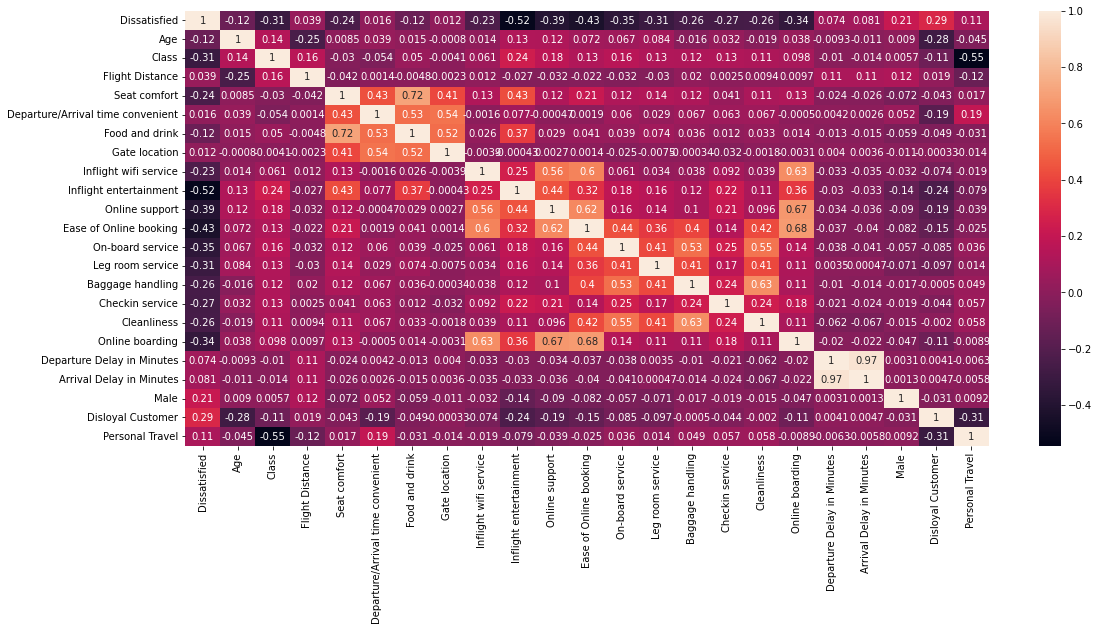

In [41]:
plt.figure(figsize=(18,8))
sns.heatmap(airline.corr(),annot=True)
plt.show()

**INFERENCE:**

In the above heatmap, Its shown that **'Departure Delay in Minutes','Arrival Delay in Minutes'** are correlated

In [42]:
print(airline[['Departure Delay in Minutes','Arrival Delay in Minutes']][airline['Departure Delay in Minutes']!=0])

        Departure Delay in Minutes  Arrival Delay in Minutes
1                              310                     305.0
6                               17                      15.0
9                               30                      26.0
10                              47                      48.0
14                              40                      48.0
...                            ...                       ...
129874                           5                       0.0
129876                         174                     172.0
129877                         155                     163.0
129878                         193                     205.0
129879                         185                     186.0

[56278 rows x 2 columns]


## Statistical Tests on Data

**HYPOTHESIS**

H0: The customer is likely satisfied

H1: The customer is not likely satified


In [43]:
# STATISTICAL TESTS:

from scipy.stats import chi2_contingency
for i in airline.drop('Dissatisfied',axis=1).columns:
    if airline[i].dtypes=='object':
        table=pd.crosstab(airline[i],df['Dissatisfied'])
        ztests,pvalue,ddof,exp=chi2_contingency(table)
        print('Type of feature:',airline[i].dtypes)
        print(f'pvalue of {i} is {round(pvalue,4)}')
        print('-'*50)
    else:
        ztests,pvalue = stats.ttest_ind(airline[i],airline['Dissatisfied'])
        print('Type of feature:',airline[i].dtypes)
        print(f'pvalue of {i} is {round(pvalue,4)}')
        print('-'*50)

Type of feature: int64
pvalue of Age is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Class is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Flight Distance is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Seat comfort is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Departure/Arrival time convenient is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Food and drink is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Gate location is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Inflight wifi service is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of Inflight entertainment is 0.0
--------------------------------------------------
Type of feature: int64
pvalue of O

**INFERENCE**

We can observe that the **pvalue < 0.05**,Thus, We can say that the data is statistically significant, indicating that strong evidence against the null hypothesis.

Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

### Age:


In [287]:
X1 = airline[airline['Dissatisfied']==0]['Age']
X2 = airline[airline['Dissatisfied']==1]['Age']

In [288]:
print('Shapiro Test on X1: ',stats.shapiro(X1))
print('Shapiro Test on X2: ',stats.shapiro(X2))

Shapiro Test on X1:  ShapiroResult(statistic=0.985644519329071, pvalue=0.0)
Shapiro Test on X2:  ShapiroResult(statistic=0.9806345701217651, pvalue=0.0)


pvalue is less than 0.05 therefore the data is not normal

In [289]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=2391319182.0, pvalue=0.0)

pvalue is less than 0.05 which shows that he age of the customers who are satisfied and dissatisfied are significantly different

Age is an important feature to predict customer satisfaction

### Flight Distance

In [290]:
X1 = airline[airline['Dissatisfied']==0]['Flight Distance']
X2 = airline[airline['Dissatisfied']==1]['Flight Distance']

In [291]:
print('Shapiro Test on X1: ',stats.shapiro(X1))
print('Shapiro Test on X2: ',stats.shapiro(X2))

Shapiro Test on X1:  ShapiroResult(statistic=0.9746549725532532, pvalue=0.0)
Shapiro Test on X2:  ShapiroResult(statistic=0.9703176617622375, pvalue=0.0)


pvalue is less than 0.05 therefore the data is not normal

In [292]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1962402714.0, pvalue=1.06264352061919e-65)

p-values is less than 0.05, which signifies that average flight distance is different for satisfied and dissatisfied customers

Flight Distance is an important feature to predict customer satisfaction

### Departure Delay in Minutes:

In [293]:
X1 = airline[airline['Dissatisfied']==0]['Departure Delay in Minutes']
X2 = airline[airline['Dissatisfied']==1]['Departure Delay in Minutes']

In [294]:
print('Shapiro Test on X1: ',stats.shapiro(X1))
print('Shapiro Test on X2: ',stats.shapiro(X2))

Shapiro Test on X1:  ShapiroResult(statistic=0.40399038791656494, pvalue=0.0)
Shapiro Test on X2:  ShapiroResult(statistic=0.4464772343635559, pvalue=0.0)


In [295]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1918209470.0, pvalue=2.1940427467514277e-151)

p-values is less than 0.05, which signifies that average flight distance is different for satisfied and dissatisfied customers

Flight Distance is an important feature to predict customer satisfaction

### Arrival Delay in Minutes:

In [296]:
X1 = airline[airline['Dissatisfied']==0]['Arrival Delay in Minutes']
X2 = airline[airline['Dissatisfied']==1]['Arrival Delay in Minutes']

In [297]:
print('Shapiro Test on X1: ',stats.shapiro(X1))
print('Shapiro Test on X2: ',stats.shapiro(X2))

Shapiro Test on X1:  ShapiroResult(statistic=0.4047793745994568, pvalue=0.0)
Shapiro Test on X2:  ShapiroResult(statistic=0.4573066234588623, pvalue=0.0)


In [298]:
stats.mannwhitneyu(X1,X2)

MannwhitneyuResult(statistic=1851977785.5, pvalue=1.1990790382973249e-300)

p-values is less than 0.05 therefore the mean arrival delay in minutes the Average Departure/Arrival Delay in minutes is significantly different for the satisfied and dissatisfied customers.

### Catagorical Features

### Class:

In [299]:
ct = pd.crosstab(airline['Class'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(12635.400608233216,
 0.0,
 2,
 array([[31813.61213095, 26303.38786905],
        [ 5134.67112529,  4245.32887471],
        [33933.71674377, 28056.28325623]]))

pvalue is less than 0.05 therefore class is a significant feature in predicting satisfcation of customer

### Seat Comfort:

In [300]:
ct = pd.crosstab(airline['Seat comfort'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(28581.204420557173,
 0.0,
 5,
 array([[ 2617.14953625,  2163.85046375],
        [11430.93842625,  9451.06157375],
        [15680.45355904, 12964.54644096],
        [15927.33380185, 13168.66619815],
        [15499.80947894, 12815.19052106],
        [ 9726.31519766,  8041.68480234]]))

pvalue is less than 0.05 therefore seat comfort is a significant factor in prediting customer satisfcation

### Departure/Arrival time convenient:

In [301]:
ct = pd.crosstab(airline['Departure/Arrival time convenient'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(207.49936544246995,
 7.05818383045264e-43,
 5,
 array([[ 3636.96747936,  3007.03252064],
        [11370.17632658,  9400.82367342],
        [12445.28230633, 10289.71769367],
        [12650.55967008, 10459.44032992],
        [16150.67557361, 13353.32442639],
        [14628.33864403, 12094.66135597]]))

p value is less than 0.05 therefore Departure/Arrival time convenient is important feature for predicting customer satisfaction

### Food and drink

In [302]:
ct = pd.crosstab(airline['Food and drink'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(9087.637569852304,
 0.0,
 5,
 array([[ 3241.74012835,  2680.25987165],
        [11499.91162047,  9508.08837953],
        [14822.66788172, 12255.33211828],
        [15362.95790311, 12702.04209689],
        [14850.58560319, 12278.41439681],
        [11104.13686316,  9180.86313684]]))

pvalue is less than 0.05 therefore food and drink is an important feature in predicting customer satisfaction

### Gate location

In [303]:
ct = pd.crosstab(airline['Gate location'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(2635.568467930175,
 0.0,
 5,
 array([[1.09481261e+00, 9.05187393e-01],
        [1.23149996e+04, 1.01820004e+04],
        [1.33791575e+04, 1.10618425e+04],
        [1.83112883e+04, 1.51397117e+04],
        [1.64205469e+04, 1.35764531e+04],
        [1.04549130e+04, 8.64408701e+03]]))

pvalue is less than 0.05 therefore gate location is an important feature in predicting customer satisfaction

### Inflight wifi service

In [304]:
ct = pd.crosstab(airline['Inflight wifi service'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(7760.45794266411,
 0.0,
 5,
 array([[   71.16281943,    58.83718057],
        [ 8030.45046993,  6639.54953007],
        [14756.43171901, 12200.56828099],
        [15063.52665519, 12454.47334481],
        [17229.06599118, 14244.93400882],
        [15731.36234525, 13006.63765475]]))

pvalue is less than 0.05 therefore inflight wifi service is an important feature in predicting customer satisfaction

### Inflight entertainment

In [305]:
ct = pd.crosstab(airline['Inflight entertainment'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(52995.4075754495,
 0.0,
 5,
 array([[ 1624.7019083 ,  1343.2980917 ],
        [ 6441.87737765,  5326.12262235],
        [10465.31370717,  8652.68629283],
        [13210.55631839, 10922.44368161],
        [22855.30797686, 18896.69202314],
        [16284.24271162, 13463.75728838]]))

pvalue is less than 0.05 there is an effect of inflight entertainment on customer satisfaction 

### Online support

In [306]:
ct = pd.crosstab(airline['Online support'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(24265.361284669336,
 0.0,
 5,
 array([[5.47406303e-01, 4.52593697e-01],
        [7.60347355e+03, 6.28652645e+03],
        [9.41319879e+03, 7.78280121e+03],
        [1.17927740e+04, 9.75022601e+03],
        [2.26659054e+04, 1.87400946e+04],
        [1.94061009e+04, 1.60448991e+04]]))

pvalue is less than 0.05 there is an effect of Online support on customer satisfaction 

### Ease of Online booking

In [307]:
ct = pd.crosstab(airline['Ease of Online booking'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(26761.224686215603,
 0.0,
 5,
 array([[9.85331346e+00, 8.14668654e+00],
        [7.33360225e+03, 6.06339775e+03],
        [1.08862692e+04, 9.00073085e+03],
        [1.22312464e+04, 1.01127536e+04],
        [2.17906027e+04, 1.80163973e+04],
        [1.86304261e+04, 1.54035739e+04]]))

pvalue is less than 0.05 there is an effect of Ease of Online booking on customer satisfaction 

### On-board service

In [308]:
ct = pd.crosstab(airline['On-board service'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(16950.722041994588,
 0.0,
 5,
 array([[2.73703152e+00, 2.26296848e+00],
        [7.23835355e+03, 5.98464645e+03],
        [9.36995369e+03, 7.74704631e+03],
        [1.47575265e+04, 1.22014735e+04],
        [2.22017049e+04, 1.83562951e+04],
        [1.73117243e+04, 1.43132757e+04]]))

pvalue is less than 0.05 there is an effect of On-board service on customer satisfaction 

### Leg room service

In [309]:
ct = pd.crosstab(airline['Leg room service'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(14635.562381559044,
 0.0,
 5,
 array([[  241.95358607,   200.04641393],
        [ 6075.11515442,  5022.88484558],
        [11869.41087522,  9813.58912478],
        [12260.2589758 , 10136.7410242 ],
        [21667.98370493, 17915.01629507],
        [18767.27770355, 15516.72229645]]))

pvalue is less than 0.05 there is an effect of Leg room service on customer satisfaction 

### Baggage handling

In [310]:
ct = pd.crosstab(airline['Baggage handling'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(12483.63046588008,
 0.0,
 4,
 array([[ 4355.16454934,  3600.83545066],
        [ 7328.67558906,  6059.32441094],
        [13363.83008333, 11049.16991667],
        [26334.07503456, 21772.92496544],
        [19500.25474372, 16122.74525628]]))

pvalue is less than 0.05 there is an effect of Baggage handling on customer satisfaction 

### Checkin service

In [311]:
ct = pd.crosstab(airline['Checkin service'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(10221.04728851678,
 0.0,
 5,
 array([[5.47406303e-01, 4.52593697e-01],
        [8.38735938e+03, 6.93464062e+03],
        [8.45359554e+03, 6.98940446e+03],
        [1.93946053e+04, 1.60353947e+04],
        [1.99102621e+04, 1.64617379e+04],
        [1.47356303e+04, 1.21833697e+04]]))

pvalue is less than 0.05 there is an effect of Checkin service on customer satisfaction 

### Cleanliness

In [312]:
ct = pd.crosstab(airline['Cleanliness'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(12050.150709950598,
 0.0,
 5,
 array([[2.73703152e+00, 2.26296848e+00],
        [4.24020923e+03, 3.50579077e+03],
        [7.31389562e+03, 6.04710438e+03],
        [1.30868425e+04, 1.08201575e+04],
        [2.66395278e+04, 2.20254722e+04],
        [1.95987879e+04, 1.62042121e+04]]))

pvalue is less than 0.05 there is an effect of Cleanliness on customer satisfaction 

### Online boarding

In [313]:
ct = pd.crosstab(airline['Online boarding'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(15901.520216979847,
 0.0,
 5,
 array([[7.66368825e+00, 6.33631175e+00],
        [8.38079050e+03, 6.92920950e+03],
        [1.01363225e+04, 8.38067748e+03],
        [1.68009943e+04, 1.38910057e+04],
        [1.92024657e+04, 1.58765343e+04],
        [1.63537633e+04, 1.35212367e+04]]))

pvalue is less than 0.05 there is an effect of Online boarding on customer satisfaction 

### Male

In [314]:
ct = pd.crosstab(airline['Male'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(5821.570446084079,
 0.0,
 1,
 array([[35966.23634805, 29736.76365195],
        [34915.76365195, 28868.23634805]]))

pvalue is less than 0.05 there is an effect of Gender on customer satisfaction 

### Disloyal Customer

In [315]:
ct = pd.crosstab(airline['Disloyal Customer'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(11081.641807674954,
 0.0,
 1,
 array([[57900.8069227, 47872.1930773],
        [12981.1930773, 10732.8069227]]))

pvalue is less than 0.05 there is an effect of Customer Type on customer satisfaction 

### Personal Travel

In [316]:
ct = pd.crosstab(airline['Personal Travel'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(1535.4262929741567,
 0.0,
 1,
 array([[48962.75680184, 40482.24319816],
        [21919.24319816, 18122.75680184]]))

pvalue is less than 0.05 there is an effect of Type of Travel on customer satisfaction 

### Departure Delay in Minutes

In [317]:
ct = pd.crosstab(airline['Departure Delay in Minutes'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(1415.1119169153305,
 4.804134884775444e-97,
 463,
 array([[4.00750681e+04, 3.31339319e+04],
        [2.00952854e+03, 1.66147146e+03],
        [1.55737093e+03, 1.28762907e+03],
        [1.38493795e+03, 1.14506205e+03],
        [1.25793969e+03, 1.04006031e+03],
        [1.16652283e+03, 9.64477168e+02],
        [1.02967126e+03, 8.51328743e+02],
        [9.55223999e+02, 7.89776001e+02],
        [8.82966367e+02, 7.30033633e+02],
        [8.48479770e+02, 7.01520230e+02],
        [7.92644327e+02, 6.55355673e+02],
        [7.12175601e+02, 5.88824399e+02],
        [6.90279349e+02, 5.70720651e+02],
        [6.36086124e+02, 5.25913876e+02],
        [6.43749813e+02, 5.32250187e+02],
        [6.01052121e+02, 4.96947879e+02],
        [5.26604864e+02, 4.35395136e+02],
        [4.99234549e+02, 4.12765451e+02],
        [4.62558326e+02, 3.82441674e+02],
        [4.60368701e+02, 3.80631299e+02],
        [4.45588731e+02, 3.68411269e+02],
        [4.22050260e+02, 3.48949740e+02],
        [3.71688880e+02, 

### Arrival Delay in Minutes

In [318]:
ct = pd.crosstab(airline['Arrival Delay in Minutes'],airline['Dissatisfied'])
stats.chi2_contingency(ct)

(2185.65160190358,
 3.133170408177485e-218,
 471,
 array([[3.98254508e+04, 3.29275492e+04],
        [1.50372512e+03, 1.24327488e+03],
        [1.41614011e+03, 1.17085989e+03],
        [1.33676619e+03, 1.10523381e+03],
        [1.29899516e+03, 1.07400484e+03],
        [1.14024733e+03, 9.42752670e+02],
        [1.10630814e+03, 9.14691861e+02],
        [9.82046908e+02, 8.11953092e+02],
        [9.58508437e+02, 7.92491563e+02],
        [8.57238271e+02, 7.08761729e+02],
        [8.02497641e+02, 6.63502359e+02],
        [7.87170264e+02, 6.50829736e+02],
        [7.43925166e+02, 6.15074834e+02],
        [7.33524446e+02, 6.06475554e+02],
        [6.34443906e+02, 5.24556094e+02],
        [5.74776619e+02, 4.75223381e+02],
        [5.67660337e+02, 4.69339663e+02],
        [5.70397368e+02, 4.71602632e+02],
        [5.13467113e+02, 4.24532887e+02],
        [4.83907172e+02, 4.00092828e+02],
        [4.43399106e+02, 3.66600894e+02],
        [4.41209480e+02, 3.64790520e+02],
        [4.00154008e+02, 3

## Train-Test Split

Before applying various classification techniques to predict the satisfaction of the customer, let us split the dataset in train and test set.

In [44]:
X = airline.drop('Dissatisfied',axis=1)
y = airline.Dissatisfied

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
# print dimension of train set
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)

# print dimension of test set
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (90640, 22)
y_train: (90640,)
X_test: (38847, 22)
y_test: (38847,)


# Base Model

## Logistic Regression

### Assumptions of Logistic Regression
1. There is linear relationship between features and log odds
2. There are no outliers in the data
3. There is no multicolinearity in the dataset

#### 1. Linear Relationship

Log odds plot of Age


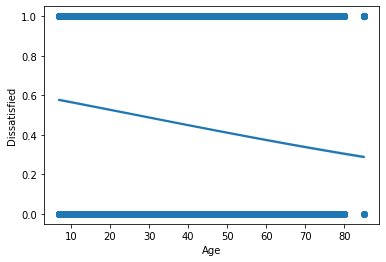

Log odds plot of Class


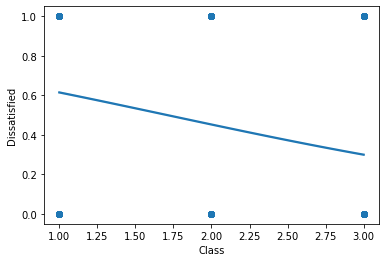

Log odds plot of Flight Distance


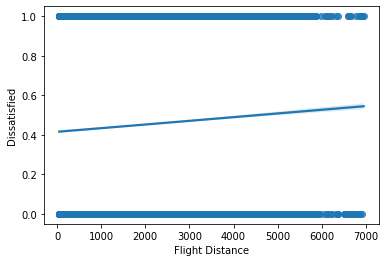

Log odds plot of Seat comfort


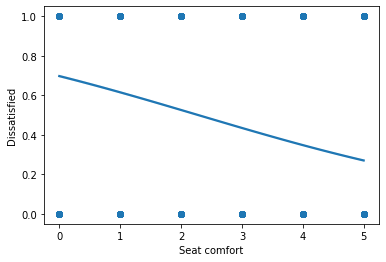

Log odds plot of Departure/Arrival time convenient


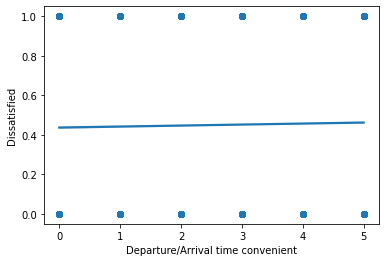

Log odds plot of Food and drink


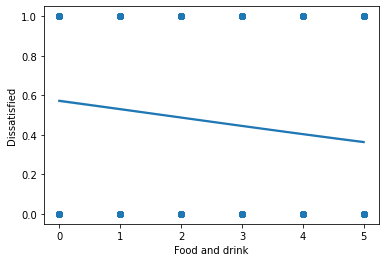

Log odds plot of Gate location


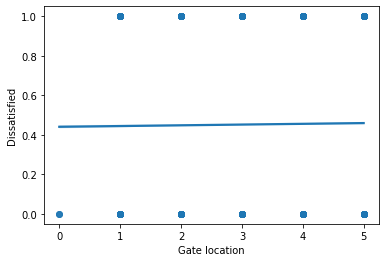

Log odds plot of Inflight wifi service


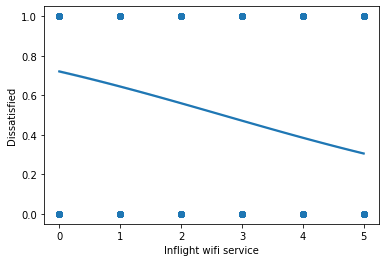

Log odds plot of Inflight entertainment


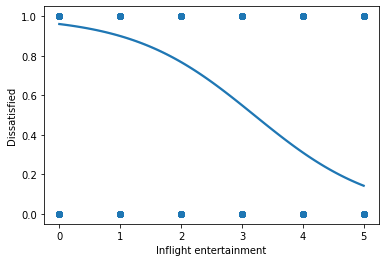

Log odds plot of Online support


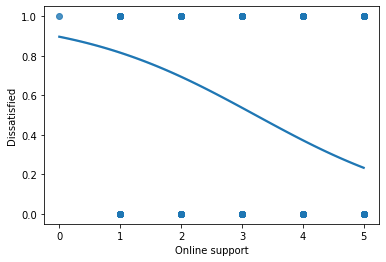

Log odds plot of Ease of Online booking


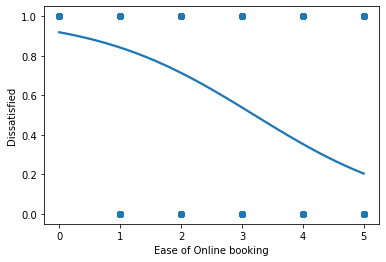

Log odds plot of On-board service


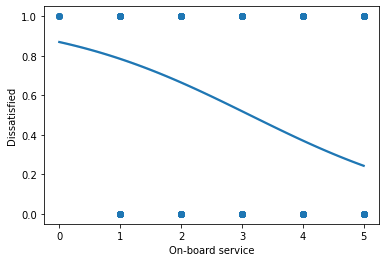

Log odds plot of Leg room service


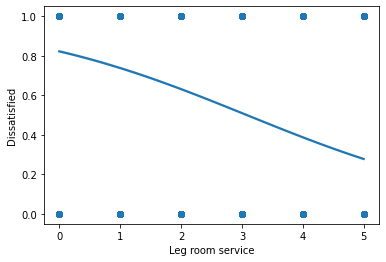

Log odds plot of Baggage handling


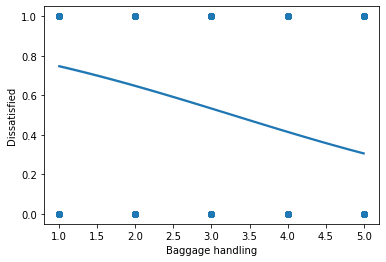

Log odds plot of Checkin service


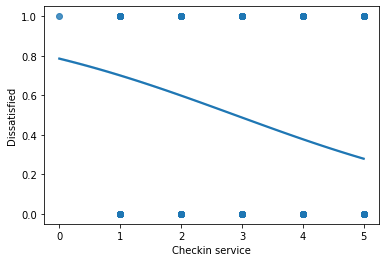

Log odds plot of Cleanliness


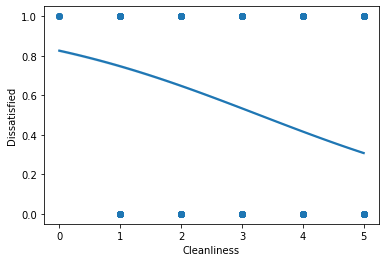

Log odds plot of Online boarding


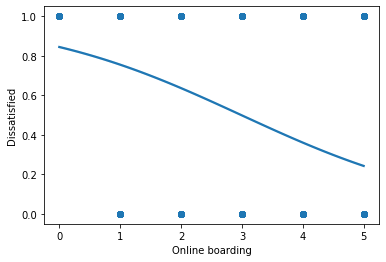

Log odds plot of Departure Delay in Minutes


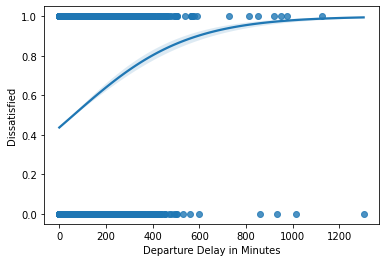

Log odds plot of Arrival Delay in Minutes


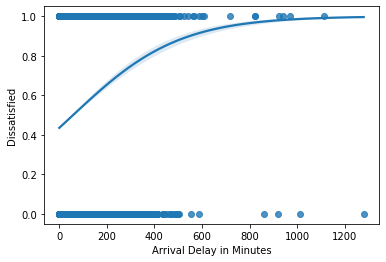

Log odds plot of Male


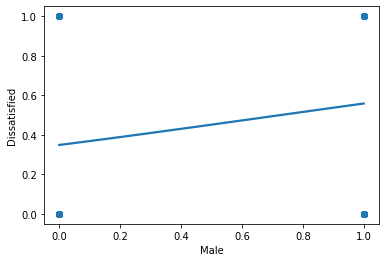

Log odds plot of Disloyal Customer


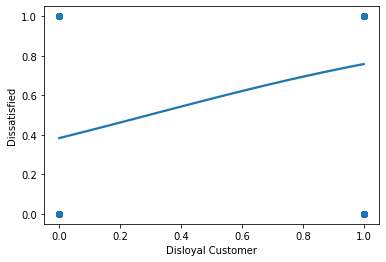

Log odds plot of Personal Travel


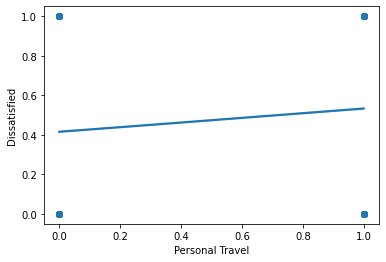

In [47]:
for i in x_train.columns:
  print('Log odds plot of',i)
  sns.regplot(x=x_train[i],y=y_train,logistic=True)
  plt.show()

There is linear relationship between the features.

#### 2. Outliers

In [48]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)
pt = PowerTransformer()
x_train = pd.DataFrame(pt.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(pt.transform(x_test),columns=x_test.columns)

#### 3. Multicolinearity

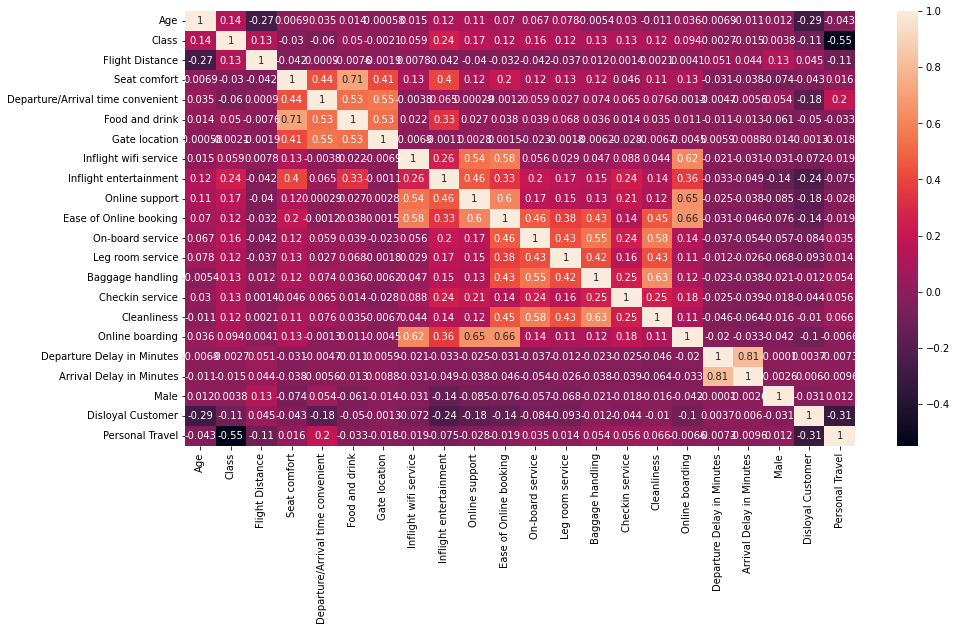

In [324]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

As shown in the heatmap there is multicolinearity in the data it can be removed using variance inflation factor

In [325]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [326]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['Features']=X.columns
vif.sort_values('VIF',ascending=False).reset_index(drop=True)

VIF                           Features
0   3.820319             Ease of Online booking
1   2.939502           Arrival Delay in Minutes
2   2.930988         Departure Delay in Minutes
3   2.676310                     Food and drink
4   2.574778                    Online boarding
5   2.388772                       Seat comfort
6   2.261601                     Online support
7   2.126272                        Cleanliness
8   1.979733              Inflight wifi service
9   1.975833                   Baggage handling
10  1.971601                    Personal Travel
11  1.888848                   On-board service
12  1.886984  Departure/Arrival time convenient
13  1.872449             Inflight entertainment
14  1.852612                              Class
15  1.739886                      Gate location
16  1.520126                  Disloyal Customer
17  1.415201                   Leg room service
18  1.230136                                Age
19  1.218725                    Checkin service
20  1.151681                    Flight Distance
21  1.059666                               Male

**INFERENCE:**
    
1. The VIF values for all the columns are between 1 and 5, shows that variables are moderately correlate.
2. And it concludes that there is No Multicolinearity.

## Logistic Regression-Model Building

In [88]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.774705897495302 

Train accuracy:  0.7752758164165932 

Precision:  0.7912815470337594 

Recall:  0.6843358467033278 

F1 Score:  0.7339332401045784 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     21208
           1       0.79      0.68      0.73     17639

    accuracy                           0.77     38847
   macro avg       0.78      0.77      0.77     38847
weighted avg       0.78      0.77      0.77     38847
 



In [90]:
import statsmodels.api as sm

# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
lr = sm.Logit(y_train,x_train).fit()

# print the summary of the model
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.427973
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Dissatisfied   No. Observations:                90640
Model:                          Logit   Df Residuals:                    90618
Method:                           MLE   Df Model:                           21
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3784
Time:                        11:38:13   Log-Likelihood:                -38791.
converged:                       True   LL-Null:                       -62408.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                   0.0331      0.001     55

### Model Tuning Using Grid Search CV

In [91]:
lr = LogisticRegression()
params = {'C': [0.01, 0.1, 1],'penalty':['l1','l2','none'],'solver':['lbfgs','newton-cg','liblinear'] }
grid = GridSearchCV(estimator=lr,param_grid=params,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [92]:
lr = LogisticRegression(C=0.01,penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.8353798234097871 

Train accuracy:  0.8358781994704325 

Precision:  0.8196861139542818 

Recall:  0.8172231985940246 

F1 Score:  0.8184528034066713 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     21208
           1       0.82      0.82      0.82     17639

    accuracy                           0.84     38847
   macro avg       0.83      0.83      0.83     38847
weighted avg       0.84      0.84      0.84     38847
 



### Confusion Matrix

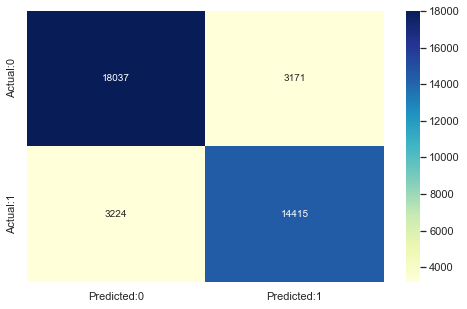

In [93]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [94]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8353798234097871 

 The Miss-classification = 1-Accuracy =  0.16462017659021289 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8172231985940246 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.850480950584685 

 Positive Predictive value = TP / (TP+FP) =  0.8196861139542818 

 Negative predictive Value = TN / (TN+FN) =  0.8483608485019519 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  5.465679468868517 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.21490992982302637


In [95]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = lr.predict(x_test)

### ROC Curve and AUC score

<function matplotlib.pyplot.show(close=None, block=None)>

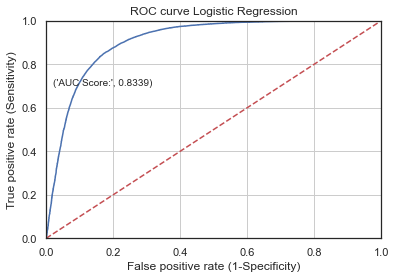

In [96]:
y_pred_prob_yes=lr.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.text(x = 0.02, y = 0.7, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))                    
plt.plot([0, 1], [0, 1],'r--')
plt.grid(True)
plt.show

### Model Cross Validation

In [98]:
X1=pd.concat([x_train,x_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(lr, X1, y1, cv=kf, scoring='f1')
print('Logistic Regression \n Mean F1 Score \n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Logistic Regression 
 Mean F1 Score 
 0.8171216595718522 
 Varience of F1 Score 
 0.001263628374055309


**INFERENCE**

1. The base model using Logistic Regression and Tuning the parameters is build with the accuracy of 84%
2. The Base model(Logistioc Regression) has AUC score of 0.8339


Now, we will build the model using other algorithms like XGBoost, Random Forest and so on

Before that, we will check which algorithm suits to become the best model, sorting it around the accuracy of the algorithm

In [99]:
# fit all the models at once

clfs = {
    'Logreg' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Ada Boost' : AdaBoostClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'XgBoost' : XGBClassifier(),
}

models_report = pd.DataFrame(columns=['model name', 'test_accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'test_accuracy' : accuracy_score(y_test,y_pred),
        'recall' : recall_score(y_test,y_pred),
        'precision' : precision_score(y_test,y_pred),
        'roc auc' : roc_auc_score(y_test,y_pred),
        'f1 score' : f1_score(y_test,y_pred),
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='test_accuracy', ascending=False)
models_report

Fitting model... Logreg
Fitting model... KNN
Fitting model... Naive Bayes
Fitting model... Decision Tree
Fitting model... Random Forest
Fitting model... Ada Boost
Fitting model... Gradient Boost
Fitting model... XgBoost


model name  test_accuracy    recall  precision   roc auc  f1 score
7         XgBoost       0.958272  0.961676   0.947230  0.958559  0.954398
4   Random Forest       0.957397  0.958444   0.948284  0.957485  0.953337
3   Decision Tree       0.937807  0.926186   0.936164  0.936829  0.931148
6  Gradient Boost       0.925734  0.916662   0.919529  0.924971  0.918093
5       Ada Boost       0.899169  0.891944   0.886666  0.898561  0.889297
2     Naive Bayes       0.820038  0.796700   0.804960  0.818074  0.800809
0          Logreg       0.774706  0.684336   0.791282  0.767102  0.733933
1             KNN       0.702088  0.650604   0.679616  0.697756  0.664794

# XGBoost:


In [342]:
dtc = XGBClassifier()
dtc.fit(x_train,y_train)
y_test_pred = dtc.predict(x_test)
y_train_pred = dtc.predict(x_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9582721960511751 

Train accuracy:  0.9699249779346867 

Precision:  0.947230288139379 

Recall:  0.9616758319632632 

F1 Score:  0.954398402115509 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21208
           1       0.95      0.96      0.95     17639

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847
 



## Confusion Matrix:

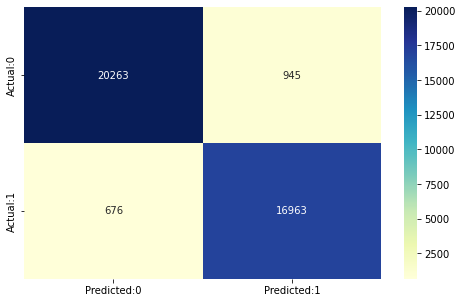

In [184]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

## Model Statistics:

In [185]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9582721960511751 

 The Miss-classification = 1-Accuracy =  0.041727803948824915 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9616758319632632 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9554413428894757 

 Positive Predictive value = TP / (TP+FP) =  0.947230288139379 

 Negative predictive Value = TN / (TN+FN) =  0.9677157457376188 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  21.5822444912983 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.04011148180047937


## ROC Curve and AUC Score:

In [186]:
tpr,fpr,thresholds = roc_curve(y_test,y_test_pred)

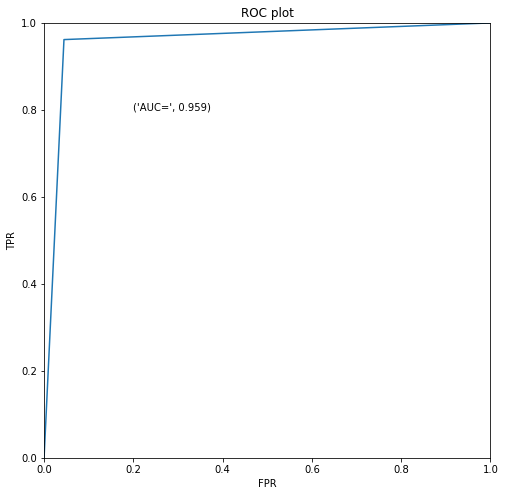

In [187]:
plt.figure(figsize=(8,8))
plt.plot(tpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC plot')
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(x=0.2,y=0.8,s=('AUC=',round(roc_auc_score(y_test,y_test_pred),3)))
plt.show()

### Model Cross Validation

In [188]:
X1=pd.concat([x_train,x_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('XGBoost \nMean F1 Score: ',np.mean(score),'\nVarience of F1 Score ',np.std(score))

XGBoost 
Mean F1 Score:  0.9538923538438748 
Varience of F1 Score  0.0007646168018073154


<a id="hyper_rf"></a>
## Tune the Hyperparameters using GridSearchCV

Let us tune the hyperparameters to obtain the optimal values for the XGBoost model.

In [239]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(x_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 9} 



#### Build the model using the tuned hyperparameters.

In [240]:

xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(x_train, y_train)

print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     21208
           1       0.95      0.96      0.96     17639

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



## ROC Curve and AUC Score(After Tuning):

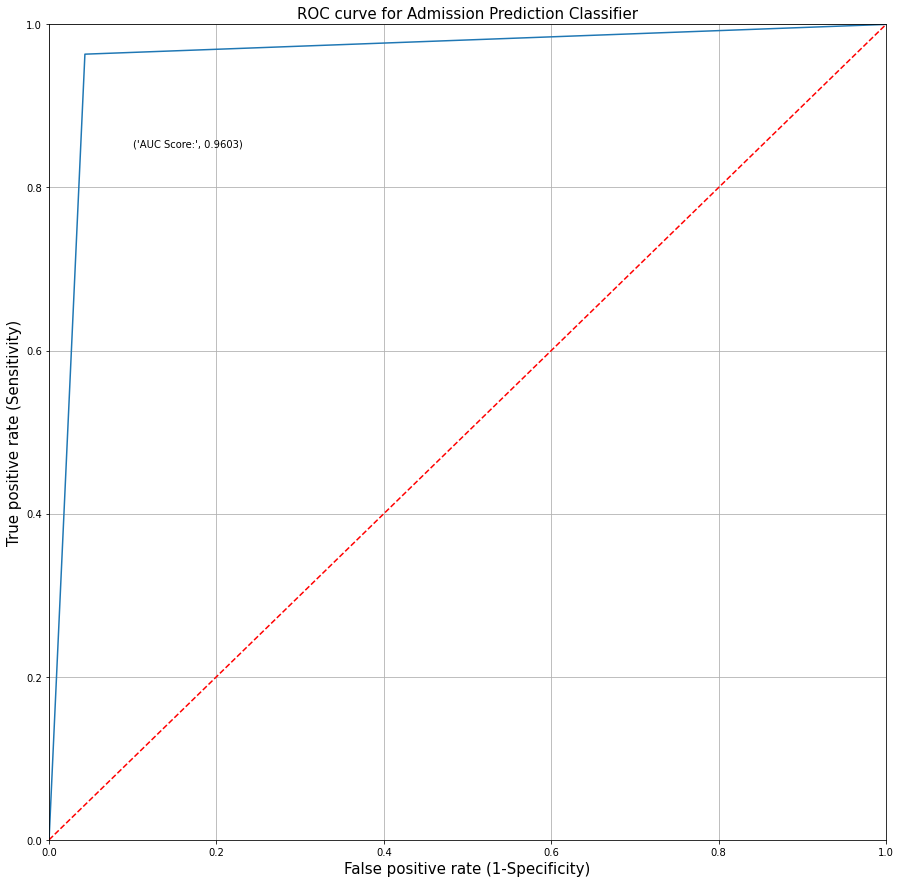

In [241]:

plot_roc(xgb_model)

### Identify the Important Features using XGBoost

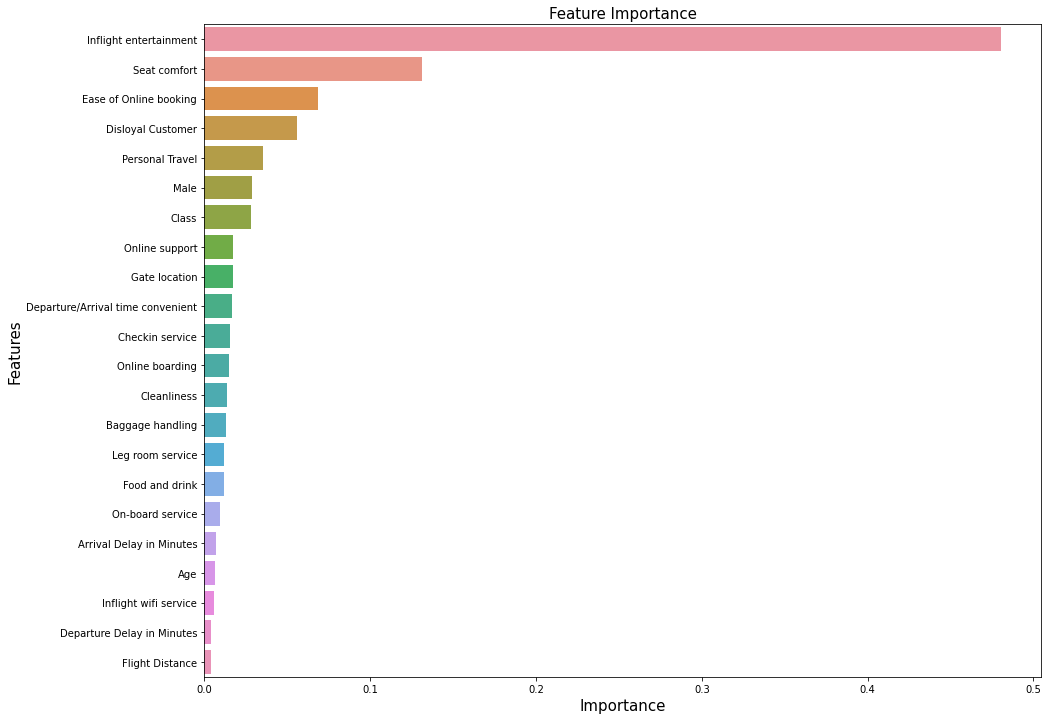

In [350]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above bar plot shows that, the variable Inflight Entertainment is of highest importance. 

## Random Forest

In [49]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(x_train, y_train)
rf_model

RandomForestClassifier(n_estimators=10, random_state=10)

**Calculate performance measures on the train set.**

In [44]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49674
           1       1.00      1.00      1.00     40966

    accuracy                           1.00     90640
   macro avg       1.00      1.00      1.00     90640
weighted avg       1.00      1.00      1.00     90640



In [45]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     21208
           1       0.95      0.94      0.94     17639

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847



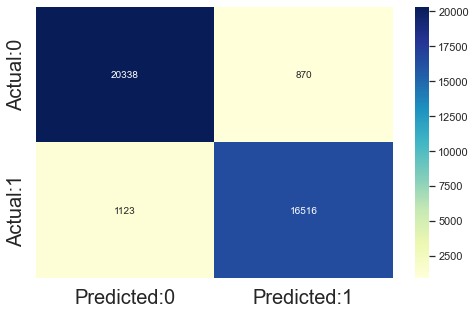

In [46]:
# call the function to plot the confusion matrix
# pass the AdaBoost model to the function
plot_confusion_matrix(rf_model)

### Identify the Important Features using Random Forest

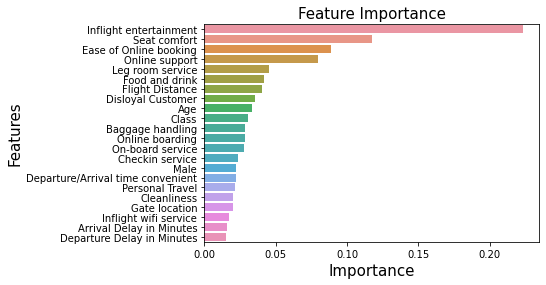

In [52]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()


### Tuning model using Grid Search

In [ ]:
rf = RandomForestClassifier(random_state=20)
params = {'n_estimators':np.arange(10,150,10),'max_depth':[10,20,30],'max_features':[2,4,6,8,10]}
grid = GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

In [ ]:
rfc = RandomForestClassifier(n_estimators=140,max_depth=30,max_features=8,random_state=20)
rfc.fit(X_train,y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

### Confusion Matrix

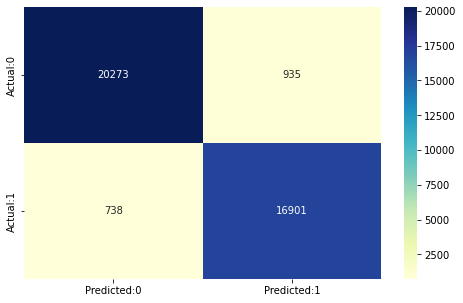

In [53]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics



In [54]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9569336113470795 

 The Miss-classification = 1-Accuracy =  0.04306638865292045 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9581608934746868 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9559128630705395 

 Positive Predictive value = TP / (TP+FP) =  0.9475779322718099 

 Negative predictive Value = TN / (TN+FN) =  0.9648755413830851 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  21.73334356022586 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.04376874518763095


### ROC Curve and AUC Score

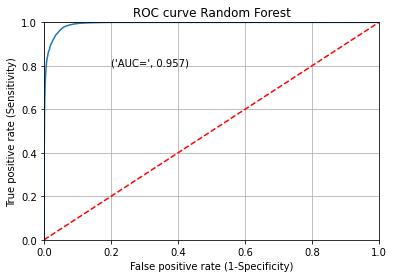

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob_yes=rfc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Random Forest')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')         
plt.text(x=0.2,y=0.8,s=('AUC=',round(roc_auc_score(y_test,y_test_pred),3)))
plt.plot([0, 1], [0, 1],'r--')
plt.grid(True)
plt.show()

### Model Cross Validation

In [63]:
X1=pd.concat([x_train,x_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(rfc, X1, y1, cv=kf, scoring='f1')
print('Random Forest Classifier \n Mean F1 Score\n',np.mean(score),
      '\n Varience of F1 Score \n',np.std(score)/np.mean(score))

Random Forest Classifier 
 Mean F1 Score
 0.9536745783020857 
 Varience of F1 Score 
 0.000381629413189207


## Decision Tree

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_test_pred = dtc.predict(x_test)
y_train_pred = dtc.predict(x_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9368033567585656 

Train accuracy:  1.0 

Precision:  0.9336798811835942 

Recall:  0.9266398321900334 

F1 Score:  0.9301465357803386 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     21208
           1       0.93      0.93      0.93     17639

    accuracy                           0.94     38847
   macro avg       0.94      0.94      0.94     38847
weighted avg       0.94      0.94      0.94     38847
 



In [105]:
dtc = DecisionTreeClassifier()
params = {'max_depth':np.arange(10,21),'criterion':['gini','entropy'],'min_samples_split':np.arange(5,16)}
grid = GridSearchCV(estimator=dtc,param_grid=params,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 12}

In [108]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=16,min_samples_split=15)
dtc.fit(x_train,y_train)
y_test_pred = dtc.predict(x_test)
y_train_pred = dtc.predict(x_train)
print('Test accuracy: ',accuracy_score(y_test,y_test_pred),'\n')
print('Train accuracy: ',accuracy_score(y_train,y_train_pred),'\n')
print('Precision: ',precision_score(y_test,y_test_pred),'\n')
print('Recall: ',recall_score(y_test,y_test_pred),'\n')
print('F1 Score: ',f1_score(y_test,y_test_pred),'\n')
print(classification_report(y_test,y_test_pred),'\n')

Test accuracy:  0.9466882899580406 

Train accuracy:  0.964905119152692 

Precision:  0.9358830776122746 

Recall:  0.9475026928964227 

F1 Score:  0.9416570414401216 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     21208
           1       0.94      0.95      0.94     17639

    accuracy                           0.95     38847
   macro avg       0.95      0.95      0.95     38847
weighted avg       0.95      0.95      0.95     38847
 



In [109]:
from sklearn.tree import plot_tree

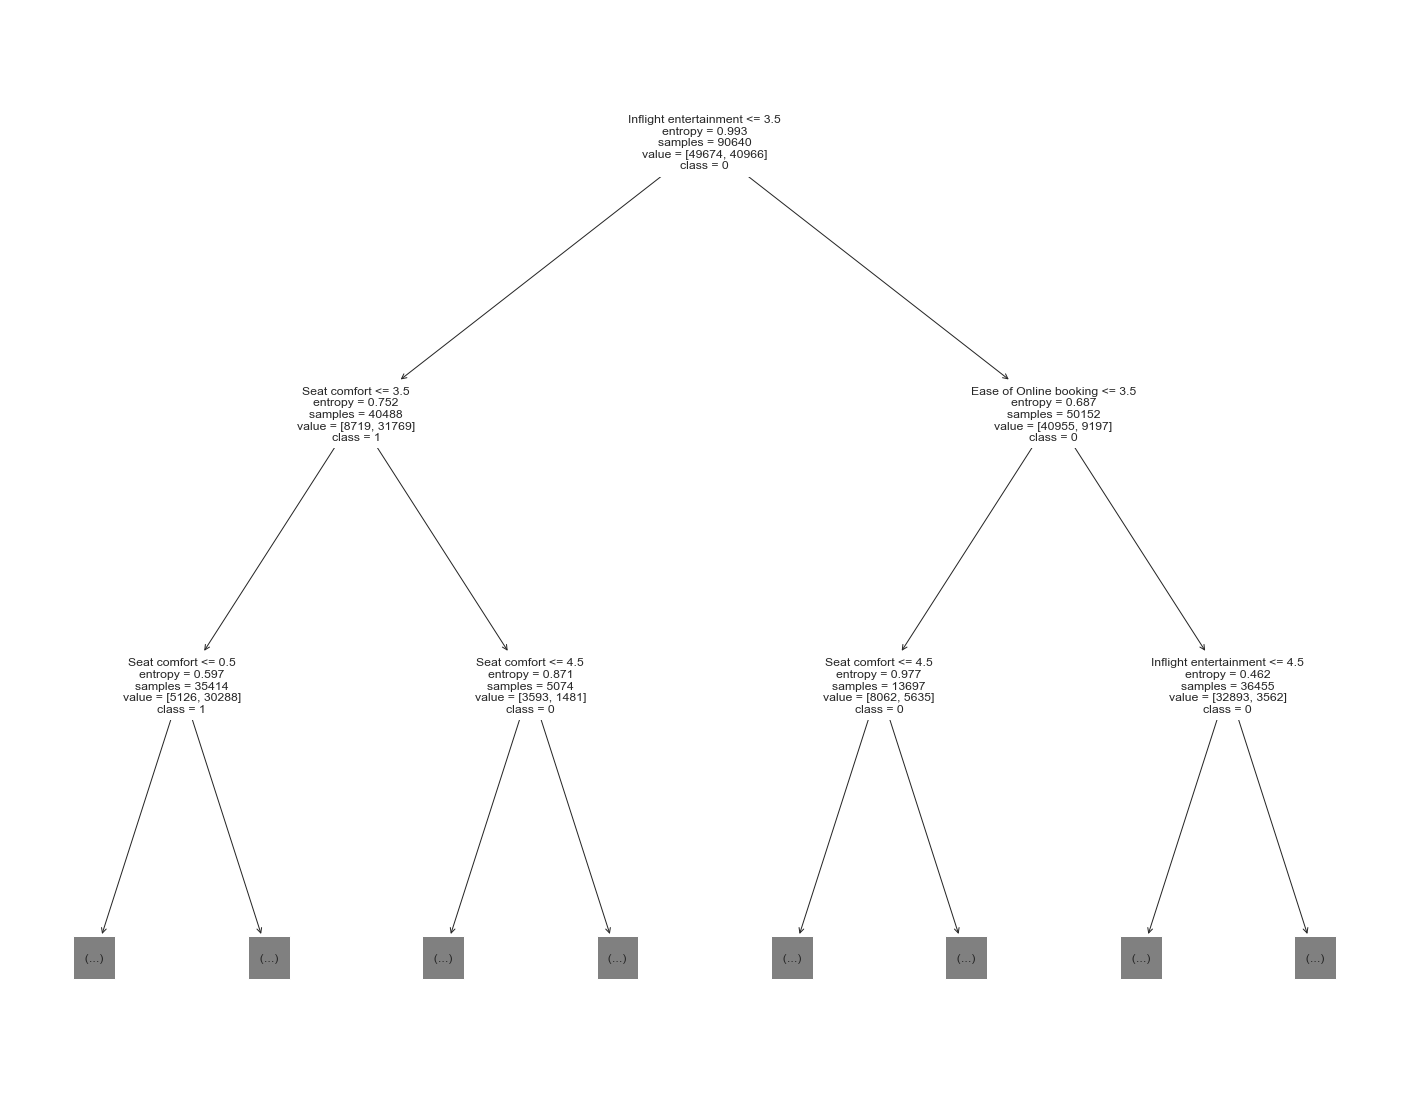

In [111]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=x_train.columns,class_names=['0','1'],max_depth=2)
plt.show()

### Confusion Matrix

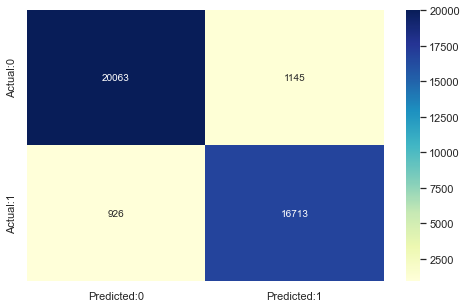

In [113]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

### Model Statistics

In [114]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print(' The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

 The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.9466882899580406 

 The Miss-classification = 1-Accuracy =  0.05331171004195945 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9475026928964227 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.9460109392682007 

 Positive Predictive value = TP / (TP+FP) =  0.9358830776122746 

 Negative predictive Value = TN / (TN+FN) =  0.9558816522940587 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  17.549901406940904 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.05549334043027794


### ROC Curve and AUC Score

<function matplotlib.pyplot.show(close=None, block=None)>

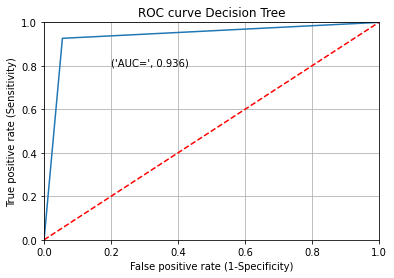

In [67]:
y_pred_prob_yes=dtc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve Decision Tree')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.text(x=0.2,y=0.8,s=('AUC=',round(roc_auc_score(y_test,y_test_pred),3)))                   
plt.plot([0, 1], [0, 1],'r--')
plt.grid(True)
plt.show

### Model Cross Validation

In [126]:
X1=pd.concat([x_train,x_test],axis=0)
y1=pd.concat([y_train,y_test],axis=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
score = cross_val_score(dtc, X1, y1, cv=kf, scoring='f1')
print('Decision Tree Classifier \n Mean F1 Score\n',np.mean(score),'\n Varience of F1 Score \n',np.std(score))

Decision Tree Classifier 
 Mean F1 Score
 0.9395491520448409 
 Varience of F1 Score 
 0.0010510619703695474


## GRADIENT BOOST:


#### Build an Gradient Boost model on a training dataset.

In [86]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation

gboost_model = GradientBoostingClassifier(n_estimators=100, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(x_train, y_train)                                             

GradientBoostingClassifier(max_depth=10, random_state=10)

#### Plot the confusion matrix.

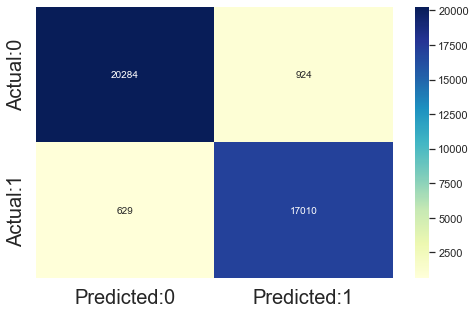

In [102]:
# call the function to plot the confusion matrix
# pass the gradient boosting model to the function
plot_confusion_matrix(gboost_model)

**Calculate performance measures on the test set.**

In [103]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21208
           1       0.95      0.96      0.96     17639

    accuracy                           0.96     38847
   macro avg       0.96      0.96      0.96     38847
weighted avg       0.96      0.96      0.96     38847



**Interpretation:** The classification report shows that the model is 79% accurate. Also, the sensitivity and specificity are equal.

#### Plot the ROC curve.

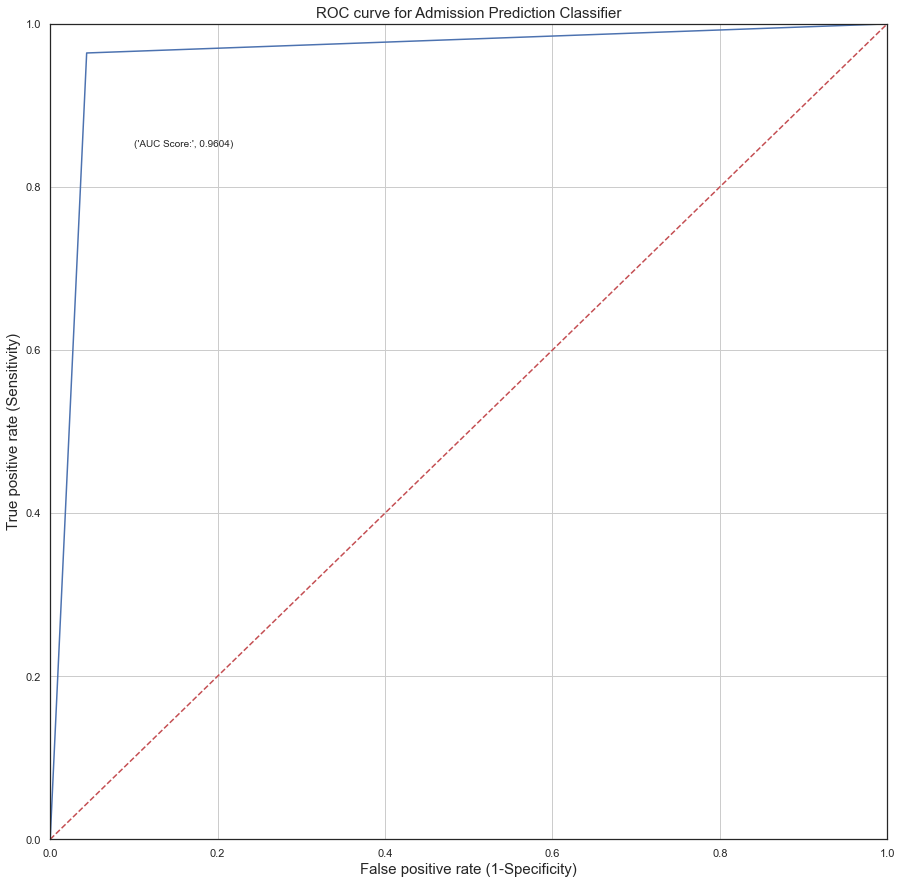

In [106]:
# call the function to plot the ROC curve
# pass the gradient boosting model to the function
plot_roc(gboost_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the gradient boosting model is away from the dotted line; with the AUC score 0.8954.

## AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

#### Build an Adaboost model on a training dataset.

In [108]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

#### Plot the confusion matrix.

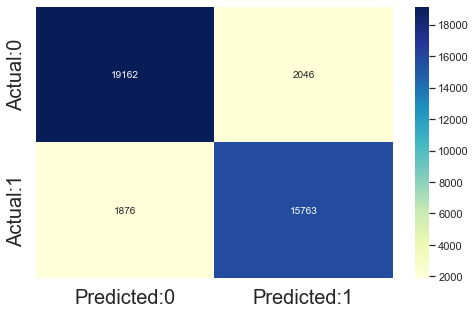

In [109]:
# call the function to plot the confusion matrix
# pass the AdaBoost model to the function
plot_confusion_matrix(ada_model)

**Calculate performance measures on the test set.**

In [110]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     21208
           1       0.89      0.89      0.89     17639

    accuracy                           0.90     38847
   macro avg       0.90      0.90      0.90     38847
weighted avg       0.90      0.90      0.90     38847



#### Plot the ROC curve.

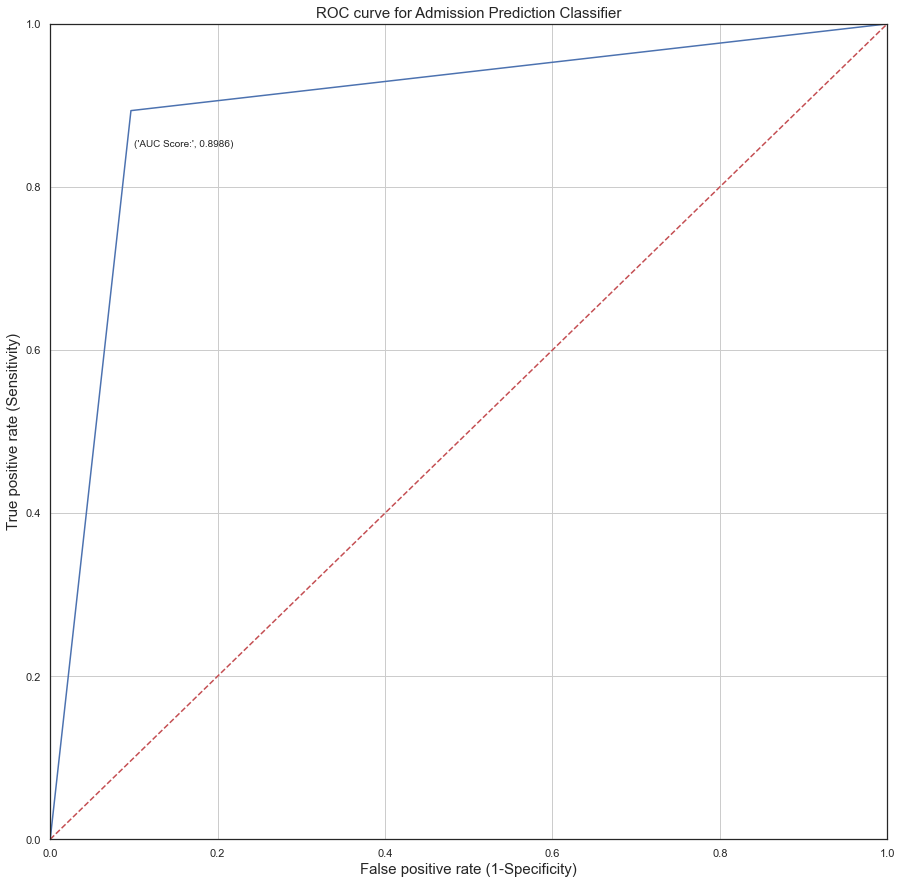

In [112]:
# call the function to plot the ROC curve
# pass the AdaBoost model to the function
plot_roc(ada_model)